In [1]:
import matplotlib.pyplot as plt

import sys
sys.path.append("../../nansat/")
from nansat import Nansat

In [2]:
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt, make_path_filter

local_api = SentinelAPI(None, None, "https://colhub-archive.met.no" ,timeout=180)
api = SentinelAPI(None, None, "https://scihub.copernicus.eu/dhus", timeout=180)

data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/"

In [3]:
# import dict containing metadata for in-situ data
# https://raw.githubusercontent.com/jerabaul29/MachineOcean_WP1_WHOI/main/mo_whoi_data/data_files/in_situ_dict.py
# from private repo at https://github.com/jerabaul29/MachineOcean_WP1_WHOI
import time
import os

os.environ["TZ"] = "UTC"
time.tzset()

import datetime
import pytz

utc_timezone = pytz.timezone("UTC")

wd = os.getcwd()

os.chdir("../../MachineOcean_WP1_WHOI/mo_whoi_data/data_files")

import in_situ_dict
in_situ_obs = in_situ_dict.get_in_situ_metadata()

os.chdir(wd)

print(in_situ_obs.keys())

dict_keys(['Endurance_8', 'Irminger_7', 'SPURS2', 'Endurance_4', 'Irminger_6', 'Pioneer_5', 'CLIMODE', 'Endurance_9', 'Pioneer_10', 'SouthernOcean2', 'Endurance_3', 'Pioneer_3', 'SPURS1', 'Endurance_7', 'Irminger_3', 'Pioneer_7', 'Pioneer_6', 'Pioneer_8'])


In [4]:
in_situ_obs['Pioneer_7']

{'datetime_start': datetime.datetime(2017, 6, 9, 13, 11, 0, 17529, tzinfo=<UTC>),
 'datetime_end': datetime.datetime(2017, 10, 31, 23, 12, 0, 16778, tzinfo=<UTC>),
 'type': 'whoi_buoy',
 'lat': [40.1334],
 'lon': [-70.7785],
 'nc_data_location': 'received, exported from .mat'}

In [5]:
##### read pickled imported in-situ measurements metadata with attached colocated Sentinel-1 sat products metadata
# (to avoid having to rerun the API search)
import pickle

with open('in_situ_obs.pickle', 'rb') as handle:
    in_situ_obs = pickle.load(handle)

with open('products_scihub.pickle', 'rb') as handle:
    products_scihub = pickle.load(handle)

In [6]:
in_situ_obs.keys()

dict_keys(['Endurance_8', 'Irminger_7', 'SPURS2', 'Endurance_4', 'Irminger_6', 'Pioneer_5', 'CLIMODE', 'Endurance_9', 'Pioneer_10', 'SouthernOcean2', 'Endurance_3', 'Pioneer_3', 'SPURS1', 'Endurance_7', 'Irminger_3', 'Pioneer_7', 'Pioneer_6', 'Pioneer_8'])

In [7]:
in_situ_obs['Pioneer_7'].keys()

dict_keys(['datetime_start', 'datetime_end', 'type', 'lat', 'lon', 'nc_data_location', 'products'])

In [8]:
in_situ_obs['Pioneer_7']['products']

OrderedDict([('7e1d1641-af53-4486-bb45-8411c61d1aba',
              {'title': 'S1A_IW_GRDH_1SDV_20171022T224224_20171022T224249_018932_01FFE8_5D27',
               'link': "https://scihub.copernicus.eu/dhus/odata/v1/Products('7e1d1641-af53-4486-bb45-8411c61d1aba')/$value",
               'link_alternative': "https://scihub.copernicus.eu/dhus/odata/v1/Products('7e1d1641-af53-4486-bb45-8411c61d1aba')/",
               'link_icon': "https://scihub.copernicus.eu/dhus/odata/v1/Products('7e1d1641-af53-4486-bb45-8411c61d1aba')/Products('Quicklook')/$value",
               'summary': 'Date: 2017-10-22T22:42:24.875Z, Instrument: SAR-C SAR, Mode: VV VH, Satellite: Sentinel-1, Size: 1.61 GB',
               'ondemand': 'false',
               'ingestiondate': datetime.datetime(2017, 10, 23, 5, 16, 24, 259000),
               'beginposition': datetime.datetime(2017, 10, 22, 22, 42, 24, 875000),
               'endposition': datetime.datetime(2017, 10, 22, 22, 42, 49, 874000),
               'missi

In [9]:
# (might have to compile some code in Nansat, see warning when importing from nansat)
# (in nansat root dir: python setup.py build_ext --inplace)

# Install nansat dependency (not found in conda env production-10-2022)
#%pip install --user pythesint

# if you are running on you own laptop you will also need to do:
#!sudo apt-get install libgdal-dev
#!pip install --user GDAL==$(gdal-config --version | awk -F'[.]' '{print $1"."$2}')

# list a SAR product with Nansat
n = Nansat(data_dir + "S1A_IW_GRDH_1SDV_20171022T224224_20171022T224249_018932_01FFE8_5D27.SAFE")
print(n)



----------------------------------------
/lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20171022T224224_20171022T224249_018932_01FFE8_5D27.SAFE----------------------------------------
Mapper: sentinel1_l1Band : 1 DN_VH
  dataType: 2
  name: DN_VH
  SourceBand: 1
  SourceFilename: /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20171022T224224_20171022T224249_018932_01FFE8_5D27.SAFE/measurement/s1a-iw-grd-vh-20171022t224224-20171022t224249-018932-01ffe8-002.tiff
Band : 2 DN_VV
  dataType: 2
  name: DN_VV
  SourceBand: 1
  SourceFilename: /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20171022T224224_20171022T224249_018932_01FFE8_5D27.SAFE/measurement/s1a-iw-grd-vv-20171022t224224-20171022t224249-018932-01ffe8-001.tiff
Band : 3 sigmaNought_VH
  dataType: 7
  name: sigmaNought_VH
  SourceBand: 1
  SourceFilename: /vsimem/7ZFMNEMI6V.vrt
Band : 4 noise_VH
  dataType: 7
  name: noise_VH
  Sou

Variable           Type              Data/Info
----------------------------------------------
Nansat             type              <class 'nansat.nansat.Nansat'>
SentinelAPI        type              <class 'sentinelsat.sentinel.SentinelAPI'>
api                SentinelAPI       <sentinelsat.sentinel.Sen<...>object at 0x1542c4cbb370>
b1                 ndarray           16701x25911: 432739611 elems, type `uint16`, 865479222 bytes (825.3853054046631 Mb)
data_dir           str               /lustre/storeB/project/IT<...>-ocean/data_raw/sentinel/
datetime           module            <module 'datetime' from '<...>b/python3.9/datetime.py'>
geojson_to_wkt     function          <function geojson_to_wkt at 0x154292de13a0>
handle             BufferedReader    <_io.BufferedReader name=<...>'products_scihub.pickle'>
in_situ_dict       module            <module 'in_situ_dict' fr<...>a_files/in_situ_dict.py'>
in_situ_obs        dict              n=18
local_api          SentinelAPI       <sentinelsat

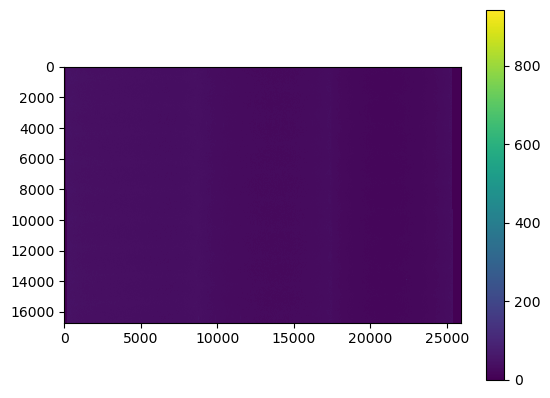

In [10]:
%matplotlib inline
# plot a SAR product with Nansat
b1 = n[1]

%whos
plt.imshow(b1);plt.colorbar()
plt.show()

# write to file
#n.write_figure('map.png', pltshow=True)

In [11]:
b1.max()

942

In [12]:
#extent = n.crop_lonlat(lonlim=[-70.77,-70.78], latlim=[40.13,40.14]) 
epsilon =  0.0005
n.crop_lonlat(lonlim=[-70.7785 - epsilon, -70.7785 + epsilon], latlim=[40.1334 - epsilon, 40.1334 + epsilon])
n
#'lat': [40.1334],
#'lon': [-70.7785]

----------------------------------------
/lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20171022T224224_20171022T224249_018932_01FFE8_5D27.SAFE----------------------------------------
Mapper: sentinel1_l1Band : 1 DN_VH
  dataType: 2
  name: DN_VH
  SourceBand: 1
  SourceFilename: /vsimem/UTN15S6GAM.vrt
Band : 2 DN_VV
  dataType: 2
  name: DN_VV
  SourceBand: 2
  SourceFilename: /vsimem/UTN15S6GAM.vrt
Band : 3 sigmaNought_VH
  dataType: 7
  name: sigmaNought_VH
  SourceBand: 3
  SourceFilename: /vsimem/UTN15S6GAM.vrt
Band : 4 noise_VH
  dataType: 7
  name: noise_VH
  SourceBand: 4
  SourceFilename: /vsimem/UTN15S6GAM.vrt
Band : 5 sigmaNought_VV
  dataType: 7
  name: sigmaNought_VV
  SourceBand: 5
  SourceFilename: /vsimem/UTN15S6GAM.vrt
Band : 6 noise_VV
  dataType: 7
  name: noise_VV
  SourceBand: 6
  SourceFilename: /vsimem/UTN15S6GAM.vrt
Band : 7 look_direction
  colormap: jet
  dataType: 6
  long_name: Sensor Azimuth Angle
  minmax: 0 360
  name: lo

In [13]:
lon, lat = n.get_geolocation_grids()

In [14]:
try:
    band_no = n.get_band_number({
        'standard_name': 'surface_backwards_scattering_coefficient_of_radar_wave',
        'polarization': 'HH',
        'dataType': '6',})
except ValueError:
    band_no = n.get_band_number({
        'standard_name': 'surface_backwards_scattering_coefficient_of_radar_wave',
        'polarization': 'VV',
        'dataType': '6',})
pol = n.get_metadata(key='polarization', band_id=band_no)
pol

'VV'

In [15]:
# Get NRCS, incidence angle, and sensor azimuth angle
s0 = n[band_no]
inc = n['incidence_angle']
az = n['look_direction']

# Test the normalization function with different crop sizes

In [16]:
station_lon = -70.7785
station_lat = 40.1334

## epsilon = 0.00005

In [17]:
%%time

sys.path.append("..")
import sar

# plot a normalize SAR product

# this is VERY memory consuming. I ran this on PPI with: qlogin -q bigmem-r8.q -pe mpi 32
# bigmem-r8.q queue is pretty busy... this may also run with: qlogin -q research-r8.q (but I have not tested it.. might have to tune mem)

s0, inc, az, grid_lons, grid_lats, pol = sar.sar_params(
    data_dir + "S1A_IW_GRDH_1SDV_20171022T224224_20171022T224249_018932_01FFE8_5D27.SAFE",
    station_lon=station_lon,
    station_lat=station_lat,
    epsilon=0.00005
)

CPU times: user 647 ms, sys: 21.1 ms, total: 668 ms
Wall time: 688 ms


In [18]:
s0

array([[-15.21855473]])

In [19]:
lon.shape

(12, 10)

In [20]:
lat

array([[40.1327545 , 40.13276934, 40.13278418, 40.13279901, 40.13281385,
        40.13282869, 40.13284352, 40.13285836, 40.1328732 , 40.13288803],
       [40.1328444 , 40.13285924, 40.13287407, 40.13288891, 40.13290375,
        40.13291858, 40.13293342, 40.13294826, 40.13296309, 40.13297793],
       [40.13293429, 40.13294913, 40.13296397, 40.13297881, 40.13299364,
        40.13300848, 40.13302332, 40.13303815, 40.13305299, 40.13306782],
       [40.13302419, 40.13303903, 40.13305386, 40.1330687 , 40.13308354,
        40.13309838, 40.13311321, 40.13312805, 40.13314288, 40.13315772],
       [40.13311409, 40.13312892, 40.13314376, 40.1331586 , 40.13317343,
        40.13318827, 40.13320311, 40.13321794, 40.13323278, 40.13324762],
       [40.13320398, 40.13321882, 40.13323366, 40.13324849, 40.13326333,
        40.13327817, 40.133293  , 40.13330784, 40.13332268, 40.13333751],
       [40.13329388, 40.13330872, 40.13332355, 40.13333839, 40.13335323,
        40.13336806, 40.1333829 , 40.13339774

In [21]:
lon

array([[-70.77893794, -70.7788222 , -70.77870647, -70.77859073,
        -70.77847499, -70.77835925, -70.77824352, -70.77812778,
        -70.77801204, -70.7778963 ],
       [-70.77895786, -70.77884212, -70.77872638, -70.77861065,
        -70.77849491, -70.77837917, -70.77826343, -70.7781477 ,
        -70.77803196, -70.77791622],
       [-70.77897778, -70.77886204, -70.7787463 , -70.77863056,
        -70.77851483, -70.77839909, -70.77828335, -70.77816761,
        -70.77805187, -70.77793614],
       [-70.77899769, -70.77888196, -70.77876622, -70.77865048,
        -70.77853474, -70.778419  , -70.77830327, -70.77818753,
        -70.77807179, -70.77795605],
       [-70.77901761, -70.77890187, -70.77878614, -70.7786704 ,
        -70.77855466, -70.77843892, -70.77832318, -70.77820744,
        -70.77809171, -70.77797597],
       [-70.77903753, -70.77892179, -70.77880605, -70.77869031,
        -70.77857458, -70.77845884, -70.7783431 , -70.77822736,
        -70.77811162, -70.77799588],
       [-7

## epsilon = 0.0005

In [22]:
%%time

sys.path.append("..")
import sar

# plot a normalize SAR product

# this is VERY memory consuming. I ran this on PPI with: qlogin -q bigmem-r8.q -pe mpi 32
# bigmem-r8.q queue is pretty busy... this may also run with: qlogin -q research-r8.q (but I have not tested it.. might have to tune mem)

s0, inc, az, grid_lons, grid_lats, pol = sar.sar_params(
    data_dir + "S1A_IW_GRDH_1SDV_20171022T224224_20171022T224249_018932_01FFE8_5D27.SAFE",
    station_lon=station_lon,
    station_lat=station_lat,
    epsilon=0.0005
)

CPU times: user 581 ms, sys: 13.3 ms, total: 594 ms
Wall time: 612 ms


In [23]:
s0

array([[-13.1782983 , -13.75798055, -14.19240008, -13.36242104,
        -14.19192496, -15.83979017, -17.94808647, -16.18693698,
        -14.67402129, -14.425549  ],
       [-13.00101316, -13.00077559, -13.00053707, -13.17758757,
        -13.00006196, -12.50764453, -12.82925299, -14.19121331,
        -14.6740223 , -14.93707421],
       [-14.42768901, -13.36289723, -14.42721292, -14.93850052,
        -12.20825007, -11.18138974, -11.66419872, -13.17663836,
        -13.17640082, -12.82854231],
       [-14.19287919, -13.55595053, -14.42721393, -13.55547445,
        -13.17735107, -12.66558932, -12.99958791, -13.17663937,
        -12.06489727, -11.53759636],
       [-13.97011522, -13.75798458, -13.0005401 , -12.66606448,
        -13.96916498, -15.8397942 , -14.93778891, -12.99935232,
        -12.35453489, -12.50669641],
       [-15.21950397, -16.56625127, -14.42721595, -13.75751046,
        -13.55523891, -15.51794729, -15.83955765, -12.99935333,
        -13.36123832, -15.21736598],
       [-1

In [24]:
lon.shape

(12, 10)

In [25]:
import numpy as np

# Find index of pixel at desired location (input longitude and latitude variables)
y_idx = []
x_idx = []

# something like this?? or do we need something more accurate? 
abslat = np.abs(lat-station_lat)
abslon = np.abs(lon-station_lon)
cor = np.maximum(abslon, abslat)
([y_idx], [x_idx]) = np.where(cor == np.min(cor))

In [26]:
y_idx

6

In [27]:
x_idx

5

In [28]:
s0[x_idx, y_idx]

-15.839557652703023

## epsilon = 0.005

In [29]:
%%time

sys.path.append("..")
import sar

# plot a normalize SAR product

# this is VERY memory consuming. I ran this on PPI with: qlogin -q bigmem-r8.q -pe mpi 32
# bigmem-r8.q queue is pretty busy... this may also run with: qlogin -q research-r8.q (but I have not tested it.. might have to tune mem)

s0, inc, az, grid_lons, grid_lats, pol = sar.sar_params(
    data_dir + "S1A_IW_GRDH_1SDV_20171022T224224_20171022T224249_018932_01FFE8_5D27.SAFE",
    station_lon=station_lon,
    station_lat=station_lat,
    epsilon=0.005
)

CPU times: user 698 ms, sys: 31.8 ms, total: 730 ms
Wall time: 829 ms


In [30]:
s0.shape

(122, 103)

In [31]:
lon.shape

(12, 10)

In [32]:
import numpy as np

# Find index of pixel at desired location (input longitude and latitude variables)
y_idx = []
x_idx = []

# something like this?? or do we need something more accurate? 
abslat = np.abs(lat-station_lat)
abslon = np.abs(lon-station_lon)
cor = np.maximum(abslon, abslat)
([y_idx], [x_idx]) = np.where(cor == np.min(cor))

In [33]:
station_lat

40.1334

In [34]:
grid_lats[x_idx, y_idx]

40.1276512729377

In [35]:
grid_lats[x_idx, y_idx+1]

40.12766611488924

In [36]:
station_lon

-70.7785

In [37]:
s0[x_idx, y_idx]

-14.437380274776201

### Check neighbour values

The differences in the locations are very small, but the values change a lot

In [38]:
s0[x_idx-1, y_idx]

-13.76791134087714

In [39]:
s0[x_idx-1, y_idx-1]

-13.010943065837461

In [40]:
s0[x_idx-1, y_idx+1]

-13.565639659111673

In [41]:
s0[x_idx+1, y_idx]

-14.202569499814809

In [42]:
s0[x_idx+1, y_idx-1]

-13.566118001831866

In [43]:
s0[x_idx+1, y_idx +1]

-15.528587612953059

In [44]:
s0[x_idx, y_idx -1]

-13.56611699394726

In [45]:
s0[x_idx, y_idx +1]

-14.202331760421087

## epsilon = 0.05

In [46]:
%%time

sys.path.append("..")
import sar

# plot a normalize SAR product

# this is VERY memory consuming. I ran this on PPI with: qlogin -q bigmem-r8.q -pe mpi 32
# bigmem-r8.q queue is pretty busy... this may also run with: qlogin -q research-r8.q (but I have not tested it.. might have to tune mem)

s0, inc, az, grid_lons, grid_lats, pol = sar.sar_params(
    data_dir + "S1A_IW_GRDH_1SDV_20171022T224224_20171022T224249_018932_01FFE8_5D27.SAFE",
    station_lon=station_lon,
    station_lat=station_lat,
    epsilon=0.05
)

CPU times: user 1.91 s, sys: 287 ms, total: 2.19 s
Wall time: 2.5 s


In [47]:
s0.shape

(1220, 1026)

In [48]:
grid_lons.shape

(1220, 1026)

In [49]:
import numpy as np

# Find index of pixel at desired location (input longitude and latitude variables)
y_idx = []
x_idx = []

# something like this?? or do we need something more accurate? 
abslat = np.abs(lat-station_lat)
abslon = np.abs(lon-station_lon)
cor = np.maximum(abslon, abslat)
([y_idx], [x_idx]) = np.where(cor == np.min(cor))

In [50]:
station_lat

40.1334

In [51]:
grid_lats[x_idx, y_idx]

40.071427915548064

In [52]:
grid_lats[x_idx, y_idx+1]

40.071442811908796

In [53]:
station_lon

-70.7785

In [54]:
s0[x_idx, y_idx]

-12.186159261629859

### We see that the the latitudes are different when we use different epsilon.
### Therefore, we need to use another distance function

## Use another distance function

In [55]:
x_idx, y_idx = sar.get_idx_of_station_in_cropped_image(grid_lons, grid_lats, station_lat, station_lon)

In [56]:
x_idx

610

In [57]:
y_idx

514

In [58]:
grid_lats[x_idx, y_idx]

40.13336806262561

In [59]:
grid_lons[x_idx, y_idx]

-70.77847875460353

In [60]:
s0[x_idx, y_idx]

-15.218317177704465

# Fill in in_situ_obs dict with SAR data

In [61]:
in_situ_obs['Pioneer_7']['products']['7e1d1641-af53-4486-bb45-8411c61d1aba']['filename']

'S1A_IW_GRDH_1SDV_20171022T224224_20171022T224249_018932_01FFE8_5D27.SAFE'

In [62]:
in_situ_obs['Pioneer_7']['lon']

[-70.7785]

In [63]:
crop_size = [0.00005]
for buoy in in_situ_obs.keys():
    for product in in_situ_obs[buoy]['products']:
        fname = in_situ_obs[buoy]['products'][product]['filename']
        station_lat = in_situ_obs[buoy]['lat'][0]
        station_lon = in_situ_obs[buoy]['lon'][0]
        in_situ_obs[buoy]['products'][product]['sar_params'] = {}
        
        for epsilon in crop_size:
            try:
                s0, inc, az, grid_lons, grid_lats, pol = sar.sar_params(
                    data_dir + fname,
                    station_lon=station_lon,
                    station_lat=station_lat,
                    epsilon=epsilon
                )

                epsilon_param_dict = {
                    'epsilon' : epsilon,
                    's0' : s0, 
                    'inc' : inc,
                    'az' : az,
                    'grid_lons' : grid_lons,
                    'grid_lats' : grid_lats,
                    'pol' : pol
                }

                in_situ_obs[buoy]['products'][product]['sar_params'][str(epsilon)] = epsilon_param_dict
                
            except:
                print('File ', fname, ' does not exist')

01:33:49|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDV_20181122T020852_20181122T020917_013711_019656_B444.SAFE, trying to read with Nansat mappers...
01:33:49|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20181114T142233_20181114T142258_024585_02B307_AC4A.SAFE, trying to read with Nansat mappers...
01:33:49|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDV_20181113T142953_20181113T143018_013587_019274_75C6.SAFE, trying to read with Nansat mappers...
01:33:49|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20181102T142233_20181102T142258_024410_02AC9B_8E4A.SAFE, trying to read with Nansat mappers...
01:33:49|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_IW_GRDH_1SDV_20181122T020852_20181122T020917_013711_019656_B444.SAFE  does not exist
File  S1A_IW_GRDH_1SDV_20181114T142233_20181114T142258_024585_02B307_AC4A.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20181113T142953_20181113T143018_013587_019274_75C6.SAFE  does not exist
File  S1A_IW_GRDH_1SDV_20181102T142233_20181102T142258_024410_02AC9B_8E4A.SAFE  does not exist


01:33:50|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20181021T142233_20181021T142258_024235_02A6D2_10F8.SAFE, trying to read with Nansat mappers...
01:33:50|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDV_20181020T142953_20181020T143018_013237_018788_7CB5.SAFE, trying to read with Nansat mappers...
01:33:50|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDV_20181017T020852_20181017T020917_013186_0185E4_84D4.SAFE, trying to read with Nansat mappers...
01:33:50|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20181009T142233_20181009T142258_024060_02A121_1A63.SAFE, trying to read with Nansat mappers...
01:33:50|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_IW_GRDH_1SDV_20181101T142953_20181101T143018_013412_018D08_C0DE.SAFE  does not exist
File  S1A_IW_GRDH_1SDV_20181021T142233_20181021T142258_024235_02A6D2_10F8.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20181020T142953_20181020T143018_013237_018788_7CB5.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20181017T020852_20181017T020917_013186_0185E4_84D4.SAFE  does not exist
File  S1A_IW_GRDH_1SDV_20181009T142233_20181009T142258_024060_02A121_1A63.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20181008T142953_20181008T143018_013062_01821F_22D0.SAFE  does not exist


01:33:50|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDV_20180926T142953_20180926T143018_012887_017CC8_D8E6.SAFE, trying to read with Nansat mappers...
01:33:50|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20210729T200350_20210729T200450_038997_0499E6_20BC.SAFE, trying to read with Nansat mappers...
01:33:50|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210728T201123_20210728T201223_027999_03571C_4E75.SAFE, trying to read with Nansat mappers...
01:33:50|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210728T085649_20210728T085714_027992_0356E5_7BF6.SAFE, trying to read with Nansat mappers...
01:33:50|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SDV_20180927T142233_20180927T142258_023885_029B5C_DC85.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20180926T142953_20180926T143018_012887_017CC8_D8E6.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210729T200350_20210729T200450_038997_0499E6_20BC.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210728T201123_20210728T201223_027999_03571C_4E75.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210728T085649_20210728T085714_027992_0356E5_7BF6.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210727T090526_20210727T090551_038961_0498DA_6942.SAFE  does not exist


01:33:50|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210723T200308_20210723T200408_027926_03550D_CDDD.SAFE, trying to read with Nansat mappers...
01:33:50|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20210722T201204_20210722T201304_038895_0496E9_F2E3.SAFE, trying to read with Nansat mappers...
01:33:50|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20210722T085731_20210722T085756_038888_0496B8_8F37.SAFE, trying to read with Nansat mappers...
01:33:50|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210721T201934_20210721T202034_027897_035427_E8BD.SAFE, trying to read with Nansat mappers...
01:33:50|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20210726T202749_20210726T202849_027970_03564C_53AE.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210723T200308_20210723T200408_027926_03550D_CDDD.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210722T201204_20210722T201304_038895_0496E9_F2E3.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210722T085731_20210722T085756_038888_0496B8_8F37.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210721T201934_20210721T202034_027897_035427_E8BD.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210721T090439_20210721T090508_027890_0353F1_19C4.SAFE  does not exist


01:33:50|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210716T201122_20210716T201222_027824_0351F8_8F78.SAFE, trying to read with Nansat mappers...
01:33:50|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210716T085648_20210716T085713_027817_0351BF_5C39.SAFE, trying to read with Nansat mappers...
01:33:50|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20210715T090526_20210715T090551_038786_049398_FA29.SAFE, trying to read with Nansat mappers...
01:33:50|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210714T202748_20210714T202848_027795_03511D_3CC4.SAFE, trying to read with Nansat mappers...
01:33:50|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20210717T200350_20210717T200450_038822_0494B4_47AD.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210716T201122_20210716T201222_027824_0351F8_8F78.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210716T085648_20210716T085713_027817_0351BF_5C39.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210715T090526_20210715T090551_038786_049398_FA29.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210714T202748_20210714T202848_027795_03511D_3CC4.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210711T200307_20210711T200407_027751_034FDC_F105.SAFE  does not exist


01:33:51|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20210710T085730_20210710T085755_038713_04917D_4D10.SAFE, trying to read with Nansat mappers...
01:33:51|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210709T201933_20210709T202033_027722_034EEC_C5C6.SAFE, trying to read with Nansat mappers...
01:33:51|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210709T090438_20210709T090507_027715_034EB6_CCC2.SAFE, trying to read with Nansat mappers...
01:33:51|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20210705T200349_20210705T200449_038647_048F77_50E1.SAFE, trying to read with Nansat mappers...
01:33:51|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20210710T201204_20210710T201304_038720_0491AA_5B0E.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210710T085730_20210710T085755_038713_04917D_4D10.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210709T201933_20210709T202033_027722_034EEC_C5C6.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210709T090438_20210709T090507_027715_034EB6_CCC2.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210705T200349_20210705T200449_038647_048F77_50E1.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210704T201121_20210704T201221_027649_034CCB_A1B6.SAFE  does not exist


01:33:51|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210702T202747_20210702T202847_027620_034BEA_8D04.SAFE, trying to read with Nansat mappers...
01:33:51|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210629T200307_20210629T200407_027576_034ABF_FB36.SAFE, trying to read with Nansat mappers...
01:33:51|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20210628T201203_20210628T201303_038545_048C6B_9769.SAFE, trying to read with Nansat mappers...
01:33:51|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20210628T085729_20210628T085754_038538_048C3B_9F93.SAFE, trying to read with Nansat mappers...
01:33:51|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SDH_20210703T090525_20210703T090550_038611_048E54_E03F.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210702T202747_20210702T202847_027620_034BEA_8D04.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210629T200307_20210629T200407_027576_034ABF_FB36.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210628T201203_20210628T201303_038545_048C6B_9769.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210628T085729_20210628T085754_038538_048C3B_9F93.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210627T201932_20210627T202032_027547_0349CF_AA22.SAFE  does not exist


01:33:51|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20210623T200348_20210623T200448_038472_048A2D_96EE.SAFE, trying to read with Nansat mappers...
01:33:51|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210622T201121_20210622T201221_027474_0347E1_4BB8.SAFE, trying to read with Nansat mappers...
01:33:51|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210622T085647_20210622T085712_027467_0347B5_8291.SAFE, trying to read with Nansat mappers...
01:33:51|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210620T202747_20210620T202847_027445_034714_55CE.SAFE, trying to read with Nansat mappers...
01:33:51|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_IW_GRDH_1SDH_20210627T090438_20210627T090507_027540_034999_24B2.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210623T200348_20210623T200448_038472_048A2D_96EE.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210622T201121_20210622T201221_027474_0347E1_4BB8.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210622T085647_20210622T085712_027467_0347B5_8291.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210620T202747_20210620T202847_027445_034714_55CE.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210617T200306_20210617T200406_027401_0345D4_B1A3.SAFE  does not exist


01:33:51|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20210616T085729_20210616T085753_038363_0486F8_B74F.SAFE, trying to read with Nansat mappers...
01:33:51|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210615T201932_20210615T202032_027372_0344E5_4AAB.SAFE, trying to read with Nansat mappers...
01:33:51|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210615T090437_20210615T090506_027365_0344AF_B76A.SAFE, trying to read with Nansat mappers...
01:33:51|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20210611T200347_20210611T200447_038297_0484F7_B082.SAFE, trying to read with Nansat mappers...
01:33:51|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20210616T201202_20210616T201302_038370_048725_38A3.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210616T085729_20210616T085753_038363_0486F8_B74F.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210615T201932_20210615T202032_027372_0344E5_4AAB.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210615T090437_20210615T090506_027365_0344AF_B76A.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210611T200347_20210611T200447_038297_0484F7_B082.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210610T201120_20210610T201220_027299_0342B7_1A2B.SAFE  does not exist


01:33:51|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210608T202746_20210608T202846_027270_0341D8_F7A7.SAFE, trying to read with Nansat mappers...
01:33:51|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210605T200305_20210605T200405_027226_034099_9359.SAFE, trying to read with Nansat mappers...
01:33:51|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20210604T201201_20210604T201301_038195_0481F6_A7F7.SAFE, trying to read with Nansat mappers...
01:33:52|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20210604T085728_20210604T085753_038188_0481C8_C32E.SAFE, trying to read with Nansat mappers...
01:33:52|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_IW_GRDH_1SDH_20210610T085646_20210610T085711_027292_034281_F5D9.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210608T202746_20210608T202846_027270_0341D8_F7A7.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210605T200305_20210605T200405_027226_034099_9359.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210604T201201_20210604T201301_038195_0481F6_A7F7.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210604T085728_20210604T085753_038188_0481C8_C32E.SAFE  does not exist


01:33:52|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210603T090436_20210603T090505_027190_033F6B_DF17.SAFE, trying to read with Nansat mappers...
01:33:52|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20210530T200347_20210530T200447_038122_047FC7_084F.SAFE, trying to read with Nansat mappers...
01:33:52|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210529T201119_20210529T201219_027124_033D78_3FBC.SAFE, trying to read with Nansat mappers...
01:33:52|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210529T085645_20210529T085710_027117_033D41_A7E9.SAFE, trying to read with Nansat mappers...
01:33:52|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20210603T201931_20210603T202031_027197_033FA2_9401.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210603T090436_20210603T090505_027190_033F6B_DF17.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210530T200347_20210530T200447_038122_047FC7_084F.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210529T201119_20210529T201219_027124_033D78_3FBC.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210529T085645_20210529T085710_027117_033D41_A7E9.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210527T202745_20210527T202845_027095_033C9E_4BA2.SAFE  does not exist


01:33:52|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20210523T201201_20210523T201243_038020_047CBD_0B8D.SAFE, trying to read with Nansat mappers...
01:33:52|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20210523T085727_20210523T085752_038013_047C8D_962F.SAFE, trying to read with Nansat mappers...
01:33:52|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210522T201930_20210522T202030_027022_033A72_3C03.SAFE, trying to read with Nansat mappers...
01:33:52|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210522T090436_20210522T090505_027015_033A3C_E380.SAFE, trying to read with Nansat mappers...
01:33:52|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20210524T200304_20210524T200404_027051_033B61_D836.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210523T201201_20210523T201243_038020_047CBD_0B8D.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210523T085727_20210523T085752_038013_047C8D_962F.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210522T201930_20210522T202030_027022_033A72_3C03.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210522T090436_20210522T090505_027015_033A3C_E380.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210518T200346_20210518T200446_037947_047A86_3ED5.SAFE  does not exist


01:33:52|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210517T085645_20210517T085710_026942_033801_636E.SAFE, trying to read with Nansat mappers...
01:33:52|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210515T202744_20210515T202844_026920_033750_1050.SAFE, trying to read with Nansat mappers...
01:33:52|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210512T200304_20210512T200404_026876_033605_9378.SAFE, trying to read with Nansat mappers...
01:33:52|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20210511T201200_20210511T201300_037845_047775_2E89.SAFE, trying to read with Nansat mappers...
01:33:52|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20210517T201119_20210517T201219_026949_03383B_12EB.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210517T085645_20210517T085710_026942_033801_636E.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210515T202744_20210515T202844_026920_033750_1050.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210512T200304_20210512T200404_026876_033605_9378.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210511T201200_20210511T201300_037845_047775_2E89.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210511T085726_20210511T085751_037838_047745_3D89.SAFE  does not exist


01:33:52|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210510T090435_20210510T090504_026840_0334D1_802C.SAFE, trying to read with Nansat mappers...
01:33:52|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20210506T200345_20210506T200445_037772_04753F_72AE.SAFE, trying to read with Nansat mappers...
01:33:52|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210505T201118_20210505T201218_026774_0332C4_80DF.SAFE, trying to read with Nansat mappers...
01:33:52|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210505T085644_20210505T085709_026767_033288_E96B.SAFE, trying to read with Nansat mappers...
01:33:52|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20210510T201930_20210510T202030_026847_033507_E445.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210510T090435_20210510T090504_026840_0334D1_802C.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210506T200345_20210506T200445_037772_04753F_72AE.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210505T201118_20210505T201218_026774_0332C4_80DF.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210505T085644_20210505T085709_026767_033288_E96B.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210504T090521_20210504T090546_037736_047415_8CF1.SAFE  does not exist


01:33:52|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210430T200303_20210430T200403_026701_03307E_7BD5.SAFE, trying to read with Nansat mappers...
01:33:53|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20210429T201159_20210429T201259_037670_0471C3_A91E.SAFE, trying to read with Nansat mappers...
01:33:53|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20210429T085726_20210429T085751_037663_04718B_3C88.SAFE, trying to read with Nansat mappers...
01:33:53|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210428T201929_20210428T202029_026672_032F75_134C.SAFE, trying to read with Nansat mappers...
01:33:53|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20210503T202744_20210503T202844_026745_0331D9_A78C.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210430T200303_20210430T200403_026701_03307E_7BD5.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210429T201159_20210429T201259_037670_0471C3_A91E.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210429T085726_20210429T085751_037663_04718B_3C88.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210428T201929_20210428T202029_026672_032F75_134C.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210428T090434_20210428T090503_026665_032F3E_A45F.SAFE  does not exist


01:33:53|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210423T201118_20210423T201218_026599_032D2B_338C.SAFE, trying to read with Nansat mappers...
01:33:53|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210423T085644_20210423T085709_026592_032CF1_9DD5.SAFE, trying to read with Nansat mappers...
01:33:53|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20210422T201934_20210422T202038_037568_046E38_D2A9.SAFE, trying to read with Nansat mappers...
01:33:53|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20210422T090521_20210422T090546_037561_046DFB_006A.SAFE, trying to read with Nansat mappers...
01:33:53|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20210424T200345_20210424T200445_037597_046F39_9E7A.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210423T201118_20210423T201218_026599_032D2B_338C.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210423T085644_20210423T085709_026592_032CF1_9DD5.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210422T201934_20210422T202038_037568_046E38_D2A9.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210422T090521_20210422T090546_037561_046DFB_006A.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210421T202743_20210421T202843_026570_032C44_CDC3.SAFE  does not exist


01:33:53|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20210417T201159_20210417T201259_037495_046BAA_484A.SAFE, trying to read with Nansat mappers...
01:33:53|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20210417T085725_20210417T085750_037488_046B72_23C6.SAFE, trying to read with Nansat mappers...
01:33:53|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210416T201928_20210416T202028_026497_0329D8_1CDD.SAFE, trying to read with Nansat mappers...
01:33:53|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210416T090434_20210416T090503_026490_0329A0_77A3.SAFE, trying to read with Nansat mappers...
01:33:53|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20210418T200303_20210418T200403_026526_032AE4_335B.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210417T201159_20210417T201259_037495_046BAA_484A.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210417T085725_20210417T085750_037488_046B72_23C6.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210416T201928_20210416T202028_026497_0329D8_1CDD.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210416T090434_20210416T090503_026490_0329A0_77A3.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210412T200344_20210412T200444_037422_04692F_D0F0.SAFE  does not exist


01:33:53|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210411T085643_20210411T085708_026417_032750_EED1.SAFE, trying to read with Nansat mappers...
01:33:53|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20210410T201933_20210410T202037_037393_046824_6706.SAFE, trying to read with Nansat mappers...
01:33:53|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20210410T090520_20210410T090545_037386_0467E8_57EF.SAFE, trying to read with Nansat mappers...
01:33:53|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210409T202743_20210409T202843_026395_0326A0_0F2C.SAFE, trying to read with Nansat mappers...


File  S1B_EW_GRDM_1SDH_20210411T201117_20210411T201217_026424_03278C_C906.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210411T085643_20210411T085708_026417_032750_EED1.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210410T201933_20210410T202037_037393_046824_6706.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210410T090520_20210410T090545_037386_0467E8_57EF.SAFE  does not exist


01:33:53|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210406T200302_20210406T200402_026351_032551_EB87.SAFE, trying to read with Nansat mappers...
01:33:53|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20210405T201159_20210405T201259_037320_0465A4_5BDE.SAFE, trying to read with Nansat mappers...
01:33:53|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20210405T085725_20210405T085750_037313_04656E_2BD3.SAFE, trying to read with Nansat mappers...
01:33:53|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210404T201928_20210404T202028_026322_032445_635D.SAFE, trying to read with Nansat mappers...
01:33:53|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20210409T202743_20210409T202843_026395_0326A0_0F2C.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210406T200302_20210406T200402_026351_032551_EB87.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210405T201159_20210405T201259_037320_0465A4_5BDE.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210405T085725_20210405T085750_037313_04656E_2BD3.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210404T201928_20210404T202028_026322_032445_635D.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210404T090433_20210404T090502_026315_03240E_B8C1.SAFE  does not exist


01:33:54|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210330T201116_20210330T201216_026249_032200_2CB7.SAFE, trying to read with Nansat mappers...
01:33:54|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210330T085643_20210330T085708_026242_0321C5_1D9F.SAFE, trying to read with Nansat mappers...
01:33:54|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20210329T201933_20210329T202037_037218_04621D_F301.SAFE, trying to read with Nansat mappers...
01:33:54|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20210329T090520_20210329T090545_037211_0461E0_BE55.SAFE, trying to read with Nansat mappers...
01:33:54|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20210331T200344_20210331T200444_037247_046327_681F.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210330T201116_20210330T201216_026249_032200_2CB7.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210330T085643_20210330T085708_026242_0321C5_1D9F.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210329T201933_20210329T202037_037218_04621D_F301.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210329T090520_20210329T090545_037211_0461E0_BE55.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210328T202742_20210328T202842_026220_032117_57E3.SAFE  does not exist


01:33:54|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20210324T201158_20210324T201258_037145_045F96_40BF.SAFE, trying to read with Nansat mappers...
01:33:54|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20210324T085724_20210324T085749_037138_045F5F_E3BB.SAFE, trying to read with Nansat mappers...
01:33:54|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210323T201928_20210323T202028_026147_031EBA_2D96.SAFE, trying to read with Nansat mappers...
01:33:54|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210323T090433_20210323T090502_026140_031E83_26F4.SAFE, trying to read with Nansat mappers...
01:33:54|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20210325T200302_20210325T200402_026176_031FB8_466C.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210324T201158_20210324T201258_037145_045F96_40BF.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210324T085724_20210324T085749_037138_045F5F_E3BB.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210323T201928_20210323T202028_026147_031EBA_2D96.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210323T090433_20210323T090502_026140_031E83_26F4.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210319T200343_20210319T200443_037072_045D1B_BF1B.SAFE  does not exist


01:33:54|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210318T085642_20210318T085707_026067_031C34_8019.SAFE, trying to read with Nansat mappers...
01:33:54|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20210317T201932_20210317T202037_037043_045C14_7219.SAFE, trying to read with Nansat mappers...
01:33:54|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20210317T090520_20210317T090545_037036_045BD8_1256.SAFE, trying to read with Nansat mappers...
01:33:54|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210316T202742_20210316T202842_026045_031B8A_91F7.SAFE, trying to read with Nansat mappers...
01:33:54|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20210318T201116_20210318T201216_026074_031C70_290A.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210318T085642_20210318T085707_026067_031C34_8019.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210317T201932_20210317T202037_037043_045C14_7219.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210317T090520_20210317T090545_037036_045BD8_1256.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210316T202742_20210316T202842_026045_031B8A_91F7.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210313T200302_20210313T200402_026001_031A27_35CB.SAFE  does not exist


01:33:54|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20210312T085724_20210312T085749_036963_04594F_FCE3.SAFE, trying to read with Nansat mappers...
01:33:54|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210311T090433_20210311T090502_025965_0318E1_B70A.SAFE, trying to read with Nansat mappers...
01:33:54|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210311T201928_20210311T202027_025972_031918_F5D9.SAFE, trying to read with Nansat mappers...
01:33:54|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20210307T200343_20210307T200443_036897_045702_7A00.SAFE, trying to read with Nansat mappers...
01:33:54|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20210312T201158_20210312T201258_036970_045986_BE8F.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210312T085724_20210312T085749_036963_04594F_FCE3.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210311T090433_20210311T090502_025965_0318E1_B70A.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210311T201928_20210311T202027_025972_031918_F5D9.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210307T200343_20210307T200443_036897_045702_7A00.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210306T201116_20210306T201216_025899_0316CB_6306.SAFE  does not exist


01:33:54|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20210305T201932_20210305T202037_036868_0455F1_83F6.SAFE, trying to read with Nansat mappers...
01:33:54|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20210305T090520_20210305T090545_036861_0455B4_167C.SAFE, trying to read with Nansat mappers...
01:33:54|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210304T202742_20210304T202842_025870_0315DF_C99D.SAFE, trying to read with Nansat mappers...
01:33:55|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210301T200301_20210301T200401_025826_031479_4CCA.SAFE, trying to read with Nansat mappers...
01:33:55|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_IW_GRDH_1SDH_20210306T085642_20210306T085707_025892_03168F_80AC.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210305T201932_20210305T202037_036868_0455F1_83F6.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210305T090520_20210305T090545_036861_0455B4_167C.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210304T202742_20210304T202842_025870_0315DF_C99D.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210301T200301_20210301T200401_025826_031479_4CCA.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210228T201158_20210228T201258_036795_04536E_3CD8.SAFE  does not exist


01:33:55|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210227T201927_20210227T202027_025797_031369_400A.SAFE, trying to read with Nansat mappers...
01:33:55|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210227T090433_20210227T090502_025790_03132F_AABF.SAFE, trying to read with Nansat mappers...
01:33:55|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210222T201116_20210222T201216_025724_031112_8C58.SAFE, trying to read with Nansat mappers...
01:33:55|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210222T085642_20210222T085707_025717_0310D7_98EA.SAFE, trying to read with Nansat mappers...
01:33:55|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SDH_20210228T085724_20210228T085749_036788_045336_627C.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210227T201927_20210227T202027_025797_031369_400A.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210227T090433_20210227T090502_025790_03132F_AABF.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210222T201116_20210222T201216_025724_031112_8C58.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210222T085642_20210222T085707_025717_0310D7_98EA.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210221T201932_20210221T202037_036693_044FE5_4C8F.SAFE  does not exist


01:33:55|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20210220T202742_20210220T202842_025695_031026_64EE.SAFE, trying to read with Nansat mappers...
01:33:55|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210220T202742_20210220T202842_025695_031026_F117.SAFE, trying to read with Nansat mappers...
01:33:55|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210217T200302_20210217T200402_025651_030EC4_2BB3.SAFE, trying to read with Nansat mappers...
01:33:55|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20210216T201158_20210216T201258_036620_044D59_77AE.SAFE, trying to read with Nansat mappers...


File  S1A_IW_GRDH_1SDH_20210221T090520_20210221T090545_036686_044FA9_C00E.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20210220T202742_20210220T202842_025695_031026_64EE.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210220T202742_20210220T202842_025695_031026_F117.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210217T200302_20210217T200402_025651_030EC4_2BB3.SAFE  does not exist


01:33:55|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20210216T085724_20210216T085749_036613_044D1F_71B4.SAFE, trying to read with Nansat mappers...
01:33:55|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210215T201928_20210215T202028_025622_030DB5_7946.SAFE, trying to read with Nansat mappers...
01:33:55|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210215T090433_20210215T090502_025615_030D7A_81F1.SAFE, trying to read with Nansat mappers...
01:33:55|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210210T201116_20210210T201216_025549_030B5E_6B34.SAFE, trying to read with Nansat mappers...
01:33:55|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20210216T201158_20210216T201258_036620_044D59_77AE.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210216T085724_20210216T085749_036613_044D1F_71B4.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210215T201928_20210215T202028_025622_030DB5_7946.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210215T090433_20210215T090502_025615_030D7A_81F1.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210210T201116_20210210T201216_025549_030B5E_6B34.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210211T200344_20210211T200444_036547_044ACB_6063.SAFE  does not exist


01:33:55|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20210209T090520_20210209T090545_036511_044989_B06F.SAFE, trying to read with Nansat mappers...
01:33:55|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20210209T201933_20210209T202037_036518_0449C6_53DD.SAFE, trying to read with Nansat mappers...
01:33:55|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210208T202742_20210208T202842_025520_030A73_928D.SAFE, trying to read with Nansat mappers...
01:33:55|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20210208T202742_20210208T202842_025520_030A73_CA58.SAFE, trying to read with Nansat mappers...
01:33:55|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_IW_GRDH_1SDH_20210210T085643_20210210T085708_025542_030B23_D6F6.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210209T090520_20210209T090545_036511_044989_B06F.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210209T201933_20210209T202037_036518_0449C6_53DD.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210208T202742_20210208T202842_025520_030A73_928D.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20210208T202742_20210208T202842_025520_030A73_CA58.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210205T200302_20210205T200402_025476_030911_C753.SAFE  does not exist


01:33:55|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20210204T085725_20210204T085750_036438_044701_32DE.SAFE, trying to read with Nansat mappers...
01:33:56|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210203T201928_20210203T202028_025447_0307FE_37D3.SAFE, trying to read with Nansat mappers...
01:33:56|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210203T090433_20210203T090502_025440_0307C3_D2CB.SAFE, trying to read with Nansat mappers...
01:33:56|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20210130T200344_20210130T200444_036372_0444BC_1C03.SAFE, trying to read with Nansat mappers...
01:33:56|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20210204T201158_20210204T201258_036445_044739_9272.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210204T085725_20210204T085750_036438_044701_32DE.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210203T201928_20210203T202028_025447_0307FE_37D3.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210203T090433_20210203T090502_025440_0307C3_D2CB.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210130T200344_20210130T200444_036372_0444BC_1C03.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210129T201107_20210129T201136_025374_0305AE_32B7.SAFE  does not exist


01:33:56|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20210128T201933_20210128T202037_036343_0443B6_DF56.SAFE, trying to read with Nansat mappers...
01:33:56|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20210128T090520_20210128T090545_036336_04437A_72C5.SAFE, trying to read with Nansat mappers...
01:33:56|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210124T200302_20210124T200402_025301_030361_F132.SAFE, trying to read with Nansat mappers...
01:33:56|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20210123T201149_20210123T201218_036270_04412D_6855.SAFE, trying to read with Nansat mappers...
01:33:56|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_IW_GRDH_1SDH_20210129T085643_20210129T085708_025367_030571_8DED.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210128T201933_20210128T202037_036343_0443B6_DF56.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210128T090520_20210128T090545_036336_04437A_72C5.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210124T200302_20210124T200402_025301_030361_F132.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210123T201149_20210123T201218_036270_04412D_6855.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210123T085725_20210123T085750_036263_0440F6_A896.SAFE  does not exist


01:33:56|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210122T090447_20210122T090512_025265_030228_D692.SAFE, trying to read with Nansat mappers...
01:33:56|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20210118T200344_20210118T200444_036197_043EA7_7B71.SAFE, trying to read with Nansat mappers...
01:33:56|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210117T201107_20210117T201136_025199_030018_3BD3.SAFE, trying to read with Nansat mappers...
01:33:56|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210117T085643_20210117T085708_025192_02FFDB_6055.SAFE, trying to read with Nansat mappers...
01:33:56|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_IW_GRDH_1SDH_20210122T201938_20210122T202003_025272_030263_76F7.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210122T090447_20210122T090512_025265_030228_D692.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20210118T200344_20210118T200444_036197_043EA7_7B71.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210117T201107_20210117T201136_025199_030018_3BD3.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210117T085643_20210117T085708_025192_02FFDB_6055.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210116T202020_20210116T202045_036168_043D9F_209B.SAFE  does not exist


01:33:56|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20210112T200303_20210112T200403_025126_02FDD3_912B.SAFE, trying to read with Nansat mappers...
01:33:56|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20210111T201149_20210111T201218_036095_043B18_DD87.SAFE, trying to read with Nansat mappers...
01:33:56|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210110T201938_20210110T202003_025097_02FCCA_81B3.SAFE, trying to read with Nansat mappers...
01:33:56|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20210111T085726_20210111T085751_036088_043ADF_645B.SAFE, trying to read with Nansat mappers...
01:33:56|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SDH_20210116T090521_20210116T090546_036161_043D62_D134.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20210112T200303_20210112T200403_025126_02FDD3_912B.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210111T201149_20210111T201218_036095_043B18_DD87.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210110T201938_20210110T202003_025097_02FCCA_81B3.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210111T085726_20210111T085751_036088_043ADF_645B.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210110T090447_20210110T090512_025090_02FC8F_126B.SAFE  does not exist


01:33:56|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210105T201108_20210105T201137_025024_02FA7E_3B8D.SAFE, trying to read with Nansat mappers...
01:33:56|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20210105T085644_20210105T085709_025017_02FA41_FEBE.SAFE, trying to read with Nansat mappers...
01:33:56|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20210104T202020_20210104T202045_035993_04377A_84CA.SAFE, trying to read with Nansat mappers...
01:33:56|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20210104T090521_20210104T090546_035986_04373D_375E.SAFE, trying to read with Nansat mappers...
01:33:56|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20210106T200345_20210106T200445_036022_043883_950A.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210105T201108_20210105T201137_025024_02FA7E_3B8D.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20210105T085644_20210105T085709_025017_02FA41_FEBE.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210104T202020_20210104T202045_035993_04377A_84CA.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20210104T090521_20210104T090546_035986_04373D_375E.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20201231T200303_20201231T200403_024951_02F832_4040.SAFE  does not exist


01:33:57|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20201230T085726_20201230T085751_035913_0434C8_C4A2.SAFE, trying to read with Nansat mappers...
01:33:57|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20201229T201939_20201229T202004_024922_02F732_43EE.SAFE, trying to read with Nansat mappers...
01:33:57|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20201229T090448_20201229T090513_024915_02F6F9_6FAE.SAFE, trying to read with Nansat mappers...
01:33:57|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20201225T200346_20201225T200446_035847_043269_4B14.SAFE, trying to read with Nansat mappers...


File  S1A_IW_GRDH_1SDH_20201230T201150_20201230T201219_035920_043501_F2C5.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20201230T085726_20201230T085751_035913_0434C8_C4A2.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20201229T201939_20201229T202004_024922_02F732_43EE.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20201229T090448_20201229T090513_024915_02F6F9_6FAE.SAFE  does not exist


01:33:57|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20201224T201108_20201224T201137_024849_02F4E3_2532.SAFE, trying to read with Nansat mappers...
01:33:57|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20201223T202021_20201223T202046_035818_043166_F7BC.SAFE, trying to read with Nansat mappers...
01:33:57|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20201223T090522_20201223T090547_035811_043128_D926.SAFE, trying to read with Nansat mappers...
01:33:57|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20201224T085644_20201224T085709_024842_02F4A6_8C6C.SAFE, trying to read with Nansat mappers...
01:33:57|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20201225T200346_20201225T200446_035847_043269_4B14.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20201224T201108_20201224T201137_024849_02F4E3_2532.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20201223T202021_20201223T202046_035818_043166_F7BC.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20201223T090522_20201223T090547_035811_043128_D926.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20201224T085644_20201224T085709_024842_02F4A6_8C6C.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20201219T200304_20201219T200404_024776_02F28F_5A8A.SAFE  does not exist


01:33:57|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20201218T085727_20201218T085752_035738_042E9E_10AC.SAFE, trying to read with Nansat mappers...
01:33:57|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20201218T085727_20201218T085752_035738_042E9E_43F6.SAFE, trying to read with Nansat mappers...
01:33:57|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20201217T201939_20201217T202004_024747_02F183_CDE7.SAFE, trying to read with Nansat mappers...
01:33:57|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20201217T090449_20201217T090514_024740_02F14A_BD69.SAFE, trying to read with Nansat mappers...
01:33:57|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SDH_20201218T201151_20201218T201220_035745_042ED6_BBBB.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20201218T085727_20201218T085752_035738_042E9E_10AC.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20201218T085727_20201218T085752_035738_042E9E_43F6.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20201217T201939_20201217T202004_024747_02F183_CDE7.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20201217T090449_20201217T090514_024740_02F14A_BD69.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20201213T200346_20201213T200446_035672_042C61_5D31.SAFE  does not exist


01:33:57|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20201212T085645_20201212T085710_024667_02EEF8_66D9.SAFE, trying to read with Nansat mappers...
01:33:57|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20201211T202022_20201211T202047_035643_042B5B_704A.SAFE, trying to read with Nansat mappers...
01:33:57|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20201211T090523_20201211T090548_035636_042B1E_2022.SAFE, trying to read with Nansat mappers...
01:33:57|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20201207T200305_20201207T200404_024601_02ECE5_AEE2.SAFE, trying to read with Nansat mappers...
01:33:57|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_IW_GRDH_1SDH_20201212T201109_20201212T201138_024674_02EF35_2B0C.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20201212T085645_20201212T085710_024667_02EEF8_66D9.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20201211T202022_20201211T202047_035643_042B5B_704A.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20201211T090523_20201211T090548_035636_042B1E_2022.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20201207T200305_20201207T200404_024601_02ECE5_AEE2.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20201206T201151_20201206T201220_035570_0428D5_8991.SAFE  does not exist


01:33:57|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20201205T201940_20201205T202005_024572_02EBD7_7404.SAFE, trying to read with Nansat mappers...
01:33:57|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20201205T090449_20201205T090514_024565_02EB9C_76AE.SAFE, trying to read with Nansat mappers...
01:33:57|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20201201T200347_20201201T200447_035497_042664_2FA9.SAFE, trying to read with Nansat mappers...
01:33:58|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20201130T201119_20201130T201219_024499_02E98D_0FFA.SAFE, trying to read with Nansat mappers...
01:33:58|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SDH_20201206T085727_20201206T085752_035563_04289C_E2E3.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20201205T201940_20201205T202005_024572_02EBD7_7404.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20201205T090449_20201205T090514_024565_02EB9C_76AE.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20201201T200347_20201201T200447_035497_042664_2FA9.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20201130T201119_20201130T201219_024499_02E98D_0FFA.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20201130T085646_20201130T085711_024492_02E951_B5A7.SAFE  does not exist


01:33:58|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20201129T090523_20201129T090548_035461_04251D_1081.SAFE, trying to read with Nansat mappers...
01:33:58|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20201128T202745_20201128T202845_024470_02E8A3_66F3.SAFE, trying to read with Nansat mappers...
01:33:58|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20201128T202745_20201128T202845_024470_02E8A3_ED38.SAFE, trying to read with Nansat mappers...
01:33:58|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20201125T200305_20201125T200405_024426_02E749_66C1.SAFE, trying to read with Nansat mappers...
01:33:58|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SDH_20201129T202022_20201129T202047_035468_04255A_AF82.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20201129T090523_20201129T090548_035461_04251D_1081.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20201128T202745_20201128T202845_024470_02E8A3_66F3.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20201128T202745_20201128T202845_024470_02E8A3_ED38.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20201125T200305_20201125T200405_024426_02E749_66C1.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20201124T201201_20201124T201301_035395_0422CD_544D.SAFE  does not exist


01:33:58|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20201123T090436_20201123T090505_024390_02E614_2FD1.SAFE, trying to read with Nansat mappers...
01:33:58|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20201119T200347_20201119T200447_035322_04204E_031F.SAFE, trying to read with Nansat mappers...
01:33:58|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20201118T201120_20201118T201220_024324_02E402_7A77.SAFE, trying to read with Nansat mappers...
01:33:58|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20201118T085646_20201118T085711_024317_02E3C5_EDF5.SAFE, trying to read with Nansat mappers...
01:33:58|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20201123T201931_20201123T202031_024397_02E64C_1762.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20201123T090436_20201123T090505_024390_02E614_2FD1.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20201119T200347_20201119T200447_035322_04204E_031F.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20201118T201120_20201118T201220_024324_02E402_7A77.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20201118T085646_20201118T085711_024317_02E3C5_EDF5.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20201117T201936_20201117T202040_035293_041F52_F4B9.SAFE  does not exist


01:33:58|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20201116T202746_20201116T202846_024295_02E320_D694.SAFE, trying to read with Nansat mappers...
01:33:58|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20201116T202746_20201116T202846_024295_02E320_7657.SAFE, trying to read with Nansat mappers...
01:33:58|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20201113T200305_20201113T200405_024251_02E1C5_4220.SAFE, trying to read with Nansat mappers...
01:33:58|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20201112T201202_20201112T201302_035220_041CC3_36E7.SAFE, trying to read with Nansat mappers...
01:33:58|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SDH_20201117T090523_20201117T090548_035286_041F16_2B39.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20201116T202746_20201116T202846_024295_02E320_D694.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20201116T202746_20201116T202846_024295_02E320_7657.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20201113T200305_20201113T200405_024251_02E1C5_4220.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20201112T201202_20201112T201302_035220_041CC3_36E7.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20201112T085728_20201112T085753_035213_041C8B_B2B9.SAFE  does not exist


01:33:58|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20201111T090437_20201111T090506_024215_02E084_B48D.SAFE, trying to read with Nansat mappers...
01:33:58|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20201107T200347_20201107T200447_035147_041A36_5FC3.SAFE, trying to read with Nansat mappers...
01:33:58|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20201106T201120_20201106T201220_024149_02DE7E_E0A6.SAFE, trying to read with Nansat mappers...
01:33:58|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20201106T085646_20201106T085711_024142_02DE43_7D02.SAFE, trying to read with Nansat mappers...
01:33:58|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20201111T201931_20201111T202031_024222_02E0BD_1241.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20201111T090437_20201111T090506_024215_02E084_B48D.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20201107T200347_20201107T200447_035147_041A36_5FC3.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20201106T201120_20201106T201220_024149_02DE7E_E0A6.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20201106T085646_20201106T085711_024142_02DE43_7D02.SAFE  does not exist


01:33:58|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20201105T090524_20201105T090549_035111_0418F0_F21F.SAFE, trying to read with Nansat mappers...
01:33:59|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20201104T202746_20201104T202846_024120_02DD99_BB00.SAFE, trying to read with Nansat mappers...
01:33:59|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20201104T202746_20201104T202846_024120_02DD99_0AE4.SAFE, trying to read with Nansat mappers...
01:33:59|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20201101T200306_20201101T200406_024076_02DC52_C32B.SAFE, trying to read with Nansat mappers...
01:33:59|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20201105T201936_20201105T202041_035118_04192D_C4D9.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20201105T090524_20201105T090549_035111_0418F0_F21F.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20201104T202746_20201104T202846_024120_02DD99_BB00.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20201104T202746_20201104T202846_024120_02DD99_0AE4.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20201101T200306_20201101T200406_024076_02DC52_C32B.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20201031T201202_20201031T201302_035045_0416A5_C40A.SAFE  does not exist


01:33:59|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20201030T201931_20201030T202031_024047_02DB55_9E9E.SAFE, trying to read with Nansat mappers...
01:33:59|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20201030T090437_20201030T090506_024040_02DB1D_A520.SAFE, trying to read with Nansat mappers...
01:33:59|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20201026T200347_20201026T200447_034972_04142D_5C16.SAFE, trying to read with Nansat mappers...
01:33:59|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20201025T201120_20201025T201220_023974_02D919_EF30.SAFE, trying to read with Nansat mappers...
01:33:59|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SDH_20201031T085728_20201031T085753_035038_04166D_CB79.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20201030T201931_20201030T202031_024047_02DB55_9E9E.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20201030T090437_20201030T090506_024040_02DB1D_A520.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20201026T200347_20201026T200447_034972_04142D_5C16.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20201025T201120_20201025T201220_023974_02D919_EF30.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20201025T085646_20201025T085711_023967_02D8DD_026E.SAFE  does not exist


01:33:59|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20201024T090524_20201024T090549_034936_0412F4_6BBA.SAFE, trying to read with Nansat mappers...
01:33:59|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20201023T202746_20201023T202846_023945_02D830_DDCA.SAFE, trying to read with Nansat mappers...
01:33:59|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20201023T202746_20201023T202846_023945_02D830_C2EB.SAFE, trying to read with Nansat mappers...
01:33:59|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20201020T200305_20201020T200405_023901_02D6D8_8911.SAFE, trying to read with Nansat mappers...
01:33:59|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20201024T201936_20201024T202041_034943_041330_8C7B.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20201024T090524_20201024T090549_034936_0412F4_6BBA.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20201023T202746_20201023T202846_023945_02D830_DDCA.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20201023T202746_20201023T202846_023945_02D830_C2EB.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20201020T200305_20201020T200405_023901_02D6D8_8911.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20201019T201202_20201019T201302_034870_0410B0_16AD.SAFE  does not exist


01:33:59|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20201018T201931_20201018T202031_023872_02D5D7_664E.SAFE, trying to read with Nansat mappers...
01:33:59|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20201018T090450_20201018T090520_023865_02D59E_481F.SAFE, trying to read with Nansat mappers...
01:33:59|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20201014T200348_20201014T200448_034797_040E2A_B4E3.SAFE, trying to read with Nansat mappers...
01:33:59|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20201013T201120_20201013T201220_023799_02D39B_01DA.SAFE, trying to read with Nansat mappers...
01:33:59|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SDH_20201019T085728_20201019T085753_034863_041079_D1EF.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20201018T201931_20201018T202031_023872_02D5D7_664E.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20201018T090450_20201018T090520_023865_02D59E_481F.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20201014T200348_20201014T200448_034797_040E2A_B4E3.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20201013T201120_20201013T201220_023799_02D39B_01DA.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20201013T085646_20201013T085711_023792_02D360_35A0.SAFE  does not exist


01:33:59|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20201011T202746_20201011T202846_023770_02D2B7_6F1A.SAFE, trying to read with Nansat mappers...
01:33:59|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20201011T202746_20201011T202846_023770_02D2B7_F14D.SAFE, trying to read with Nansat mappers...
01:33:59|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20201008T200305_20201008T200405_023726_02D168_FFD2.SAFE, trying to read with Nansat mappers...
01:33:59|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20201007T201202_20201007T201302_034695_040A8D_2ACE.SAFE, trying to read with Nansat mappers...
01:33:59|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20201012T201936_20201012T202041_034768_040D1B_12FD.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20201011T202746_20201011T202846_023770_02D2B7_6F1A.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20201011T202746_20201011T202846_023770_02D2B7_F14D.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20201008T200305_20201008T200405_023726_02D168_FFD2.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20201007T201202_20201007T201302_034695_040A8D_2ACE.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20201007T085728_20201007T085753_034688_040A55_72B9.SAFE  does not exist


01:34:00|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20201006T201931_20201006T202031_023697_02D073_002E.SAFE, trying to read with Nansat mappers...
01:34:00|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20201006T201931_20201006T202031_023697_02D073_A804.SAFE, trying to read with Nansat mappers...
01:34:00|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20201006T090451_20201006T090520_023690_02D03A_244F.SAFE, trying to read with Nansat mappers...
01:34:00|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20201002T200347_20201002T200447_034622_040810_09A3.SAFE, trying to read with Nansat mappers...
01:34:00|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20201006T201931_20201006T202031_023697_02D073_8667.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20201006T201931_20201006T202031_023697_02D073_002E.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20201006T201931_20201006T202031_023697_02D073_A804.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20201006T090451_20201006T090520_023690_02D03A_244F.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20201002T200347_20201002T200447_034622_040810_09A3.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20201001T201120_20201001T201220_023624_02CE2B_1C52.SAFE  does not exist


01:34:00|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20200930T201936_20200930T202040_034593_040707_5603.SAFE, trying to read with Nansat mappers...
01:34:00|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20200929T202746_20200929T202846_023595_02CD49_32CD.SAFE, trying to read with Nansat mappers...
01:34:00|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20200929T202746_20200929T202846_023595_02CD49_14D8.SAFE, trying to read with Nansat mappers...
01:34:00|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20200926T200305_20200926T200405_023551_02CBF2_38C9.SAFE, trying to read with Nansat mappers...
01:34:00|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_IW_GRDH_1SDH_20201001T085646_20201001T085711_023617_02CDF1_43C6.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20200930T201936_20200930T202040_034593_040707_5603.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20200929T202746_20200929T202846_023595_02CD49_32CD.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20200929T202746_20200929T202846_023595_02CD49_14D8.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20200926T200305_20200926T200405_023551_02CBF2_38C9.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20200925T201202_20200925T201302_034520_040468_F9CC.SAFE  does not exist


01:34:00|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20200924T201931_20200924T202031_023522_02CAF1_F4ED.SAFE, trying to read with Nansat mappers...
01:34:00|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20200924T090450_20200924T090519_023515_02CAB8_9CB2.SAFE, trying to read with Nansat mappers...
01:34:00|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20200920T200347_20200920T200447_034447_0401ED_537C.SAFE, trying to read with Nansat mappers...
01:34:00|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20200919T201120_20200919T201220_023449_02C8AF_B399.SAFE, trying to read with Nansat mappers...


File  S1A_IW_GRDH_1SDH_20200925T085728_20200925T085753_034513_040430_B783.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20200924T201931_20200924T202031_023522_02CAF1_F4ED.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20200924T090450_20200924T090519_023515_02CAB8_9CB2.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20200920T200347_20200920T200447_034447_0401ED_537C.SAFE  does not exist


01:34:00|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20200919T085646_20200919T085711_023442_02C872_F6CF.SAFE, trying to read with Nansat mappers...
01:34:00|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20200918T201936_20200918T202040_034418_0400D2_2F91.SAFE, trying to read with Nansat mappers...
01:34:00|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20200917T202745_20200917T202845_023420_02C7D2_DD9C.SAFE, trying to read with Nansat mappers...
01:34:00|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20200917T202745_20200917T202845_023420_02C7D2_2CAC.SAFE, trying to read with Nansat mappers...
01:34:00|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20200919T201120_20200919T201220_023449_02C8AF_B399.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20200919T085646_20200919T085711_023442_02C872_F6CF.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20200918T201936_20200918T202040_034418_0400D2_2F91.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20200917T202745_20200917T202845_023420_02C7D2_DD9C.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20200917T202745_20200917T202845_023420_02C7D2_2CAC.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20200914T200305_20200914T200405_023376_02C676_34EE.SAFE  does not exist


01:34:00|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20200913T085727_20200913T085752_034338_03FE07_0B32.SAFE, trying to read with Nansat mappers...
01:34:00|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20200912T201931_20200912T202031_023347_02C576_1548.SAFE, trying to read with Nansat mappers...
01:34:00|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20200908T200347_20200908T200447_034272_03FBAF_ECD9.SAFE, trying to read with Nansat mappers...
01:34:00|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20200907T201119_20200907T201219_023274_02C333_5DD7.SAFE, trying to read with Nansat mappers...
01:34:01|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20200913T201201_20200913T201301_034345_03FE3F_AB5D.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20200913T085727_20200913T085752_034338_03FE07_0B32.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20200912T201931_20200912T202031_023347_02C576_1548.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20200908T200347_20200908T200447_034272_03FBAF_ECD9.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20200907T201119_20200907T201219_023274_02C333_5DD7.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20200907T085645_20200907T085710_023267_02C2F8_3149.SAFE  does not exist


01:34:01|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20200905T202745_20200905T202845_023245_02C24B_DE97.SAFE, trying to read with Nansat mappers...
01:34:01|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20200905T202745_20200905T202845_023245_02C24B_61CD.SAFE, trying to read with Nansat mappers...
01:34:01|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20200902T200304_20200902T200404_023201_02C0F8_0613.SAFE, trying to read with Nansat mappers...
01:34:01|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20200901T201201_20200901T201301_034170_03F81F_544C.SAFE, trying to read with Nansat mappers...
01:34:01|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20200906T201935_20200906T202040_034243_03FAAB_5A9E.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20200905T202745_20200905T202845_023245_02C24B_DE97.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20200905T202745_20200905T202845_023245_02C24B_61CD.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20200902T200304_20200902T200404_023201_02C0F8_0613.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20200901T201201_20200901T201301_034170_03F81F_544C.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20200901T085727_20200901T085752_034163_03F7E7_6124.SAFE  does not exist


01:34:01|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20200827T200346_20200827T200446_034097_03F586_5ECE.SAFE, trying to read with Nansat mappers...
01:34:01|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20200826T201119_20200826T201219_023099_02BDBE_99B3.SAFE, trying to read with Nansat mappers...
01:34:01|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20200826T085645_20200826T085710_023092_02BD83_EA38.SAFE, trying to read with Nansat mappers...
01:34:01|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20200825T201935_20200825T202039_034068_03F489_6F49.SAFE, trying to read with Nansat mappers...
01:34:01|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20200831T201930_20200831T202030_023172_02BFFC_0753.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20200827T200346_20200827T200446_034097_03F586_5ECE.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20200826T201119_20200826T201219_023099_02BDBE_99B3.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20200826T085645_20200826T085710_023092_02BD83_EA38.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20200825T201935_20200825T202039_034068_03F489_6F49.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20200824T202745_20200824T202845_023070_02BCDB_B523.SAFE  does not exist


01:34:01|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20200821T200304_20200821T200404_023026_02BB84_3823.SAFE, trying to read with Nansat mappers...
01:34:01|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20200820T201200_20200820T201300_033995_03F1F0_EC19.SAFE, trying to read with Nansat mappers...
01:34:01|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20200820T085726_20200820T085751_033988_03F1B8_1EA9.SAFE, trying to read with Nansat mappers...
01:34:01|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20200819T201929_20200819T202029_022997_02BA7E_85EC.SAFE, trying to read with Nansat mappers...
01:34:01|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20200824T202745_20200824T202845_023070_02BCDB_4223.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20200821T200304_20200821T200404_023026_02BB84_3823.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20200820T201200_20200820T201300_033995_03F1F0_EC19.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20200820T085726_20200820T085751_033988_03F1B8_1EA9.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20200819T201929_20200819T202029_022997_02BA7E_85EC.SAFE  does not exist
File  S1A_IW_GRDH_1SDV_20170116T143019_20170116T143044_014858_018395_45B6.SAFE  does not exist


01:34:01|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20170111T142157_20170111T142222_014785_018142_0E0A.SAFE, trying to read with Nansat mappers...
01:34:01|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDV_20170107T020842_20170107T020912_003736_0066B2_7A0E.SAFE, trying to read with Nansat mappers...
01:34:01|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSV_20161230T142219_20161230T142244_014610_017C01_66CF.SAFE, trying to read with Nansat mappers...
01:34:01|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20161223T143021_20161223T143046_014508_0178DB_02F7.SAFE, trying to read with Nansat mappers...
01:34:01|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SSV_20170113T020920_20170113T020948_014807_0181F7_9751.SAFE  does not exist
File  S1A_IW_GRDH_1SDV_20170111T142157_20170111T142222_014785_018142_0E0A.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20170107T020842_20170107T020912_003736_0066B2_7A0E.SAFE  does not exist
File  S1A_IW_GRDH_1SSV_20161230T142219_20161230T142244_014610_017C01_66CF.SAFE  does not exist
File  S1A_IW_GRDH_1SDV_20161223T143021_20161223T143046_014508_0178DB_02F7.SAFE  does not exist
File  S1A_IW_GRDH_1SSV_20161220T020922_20161220T020950_014457_017742_01F4.SAFE  does not exist


01:34:01|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDV_20161214T020844_20161214T020914_003386_005C86_0B21.SAFE, trying to read with Nansat mappers...
01:34:01|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSV_20161206T142220_20161206T142245_014260_01710A_99DC.SAFE, trying to read with Nansat mappers...
01:34:02|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20161129T143022_20161129T143047_014158_016DD7_494B.SAFE, trying to read with Nansat mappers...
01:34:02|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSV_20161126T020923_20161126T020951_014107_016C3C_7FD1.SAFE, trying to read with Nansat mappers...
01:34:02|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SDV_20161218T142159_20161218T142224_014435_01768A_9975.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20161214T020844_20161214T020914_003386_005C86_0B21.SAFE  does not exist
File  S1A_IW_GRDH_1SSV_20161206T142220_20161206T142245_014260_01710A_99DC.SAFE  does not exist
File  S1A_IW_GRDH_1SDV_20161129T143022_20161129T143047_014158_016DD7_494B.SAFE  does not exist
File  S1A_IW_GRDH_1SSV_20161126T020923_20161126T020951_014107_016C3C_7FD1.SAFE  does not exist
File  S1A_IW_GRDH_1SDV_20161124T142159_20161124T142224_014085_016B88_8E1B.SAFE  does not exist


01:34:02|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20161105T143023_20161105T143048_013808_016307_1F20.SAFE, trying to read with Nansat mappers...
01:34:02|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSV_20161102T020923_20161102T020951_013757_016169_0AD9.SAFE, trying to read with Nansat mappers...
01:34:02|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20161031T142200_20161031T142225_013735_0160AF_3979.SAFE, trying to read with Nansat mappers...
01:34:02|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSV_20161019T142221_20161019T142246_013560_015B53_A040.SAFE, trying to read with Nansat mappers...
01:34:02|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SSV_20161112T142221_20161112T142246_013910_01663C_9DCE.SAFE  does not exist
File  S1A_IW_GRDH_1SDV_20161105T143023_20161105T143048_013808_016307_1F20.SAFE  does not exist
File  S1A_IW_GRDH_1SSV_20161102T020923_20161102T020951_013757_016169_0AD9.SAFE  does not exist
File  S1A_IW_GRDH_1SDV_20161031T142200_20161031T142225_013735_0160AF_3979.SAFE  does not exist
File  S1A_IW_GRDH_1SSV_20161019T142221_20161019T142246_013560_015B53_A040.SAFE  does not exist


01:34:02|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSV_20161009T020923_20161009T020951_013407_015677_54C0.SAFE, trying to read with Nansat mappers...
01:34:02|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20161007T142200_20161007T142225_013385_0155BE_2BEA.SAFE, trying to read with Nansat mappers...
01:34:02|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20200122T090523_20200122T090548_030911_038C48_1369.SAFE, trying to read with Nansat mappers...
01:34:02|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20200118T200257_20200118T200357_019876_025982_BDCD.SAFE, trying to read with Nansat mappers...
01:34:02|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SDV_20161012T143023_20161012T143048_013458_015819_D483.SAFE  does not exist
File  S1A_IW_GRDH_1SSV_20161009T020923_20161009T020951_013407_015677_54C0.SAFE  does not exist
File  S1A_IW_GRDH_1SDV_20161007T142200_20161007T142225_013385_0155BE_2BEA.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20200122T090523_20200122T090548_030911_038C48_1369.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20200118T200257_20200118T200357_019876_025982_BDCD.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20200117T201143_20200117T201212_030845_038A03_72E8.SAFE  does not exist


01:34:02|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20200116T201932_20200116T201957_019847_025877_77E1.SAFE, trying to read with Nansat mappers...
01:34:02|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20200116T090441_20200116T090506_019840_02583E_D49A.SAFE, trying to read with Nansat mappers...
01:34:02|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20200112T200339_20200112T200439_030772_03876D_362D.SAFE, trying to read with Nansat mappers...
01:34:02|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20200111T201101_20200111T201130_019774_025637_2EE9.SAFE, trying to read with Nansat mappers...
01:34:02|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SDH_20200117T085719_20200117T085744_030838_0389CA_5271.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20200116T201932_20200116T201957_019847_025877_77E1.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20200116T090441_20200116T090506_019840_02583E_D49A.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20200112T200339_20200112T200439_030772_03876D_362D.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20200111T201101_20200111T201130_019774_025637_2EE9.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20200111T085638_20200111T085703_019767_0255FD_1648.SAFE  does not exist


01:34:02|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20200110T090523_20200110T090548_030736_038620_2807.SAFE, trying to read with Nansat mappers...
01:34:02|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20200106T200257_20200106T200357_019701_0253F0_3145.SAFE, trying to read with Nansat mappers...
01:34:02|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20200105T201144_20200105T201213_030670_0383E3_3E61.SAFE, trying to read with Nansat mappers...
01:34:02|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20200105T085720_20200105T085745_030663_0383AB_2773.SAFE, trying to read with Nansat mappers...
01:34:02|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SDH_20200110T202014_20200110T202039_030743_03865F_49DF.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20200110T090523_20200110T090548_030736_038620_2807.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20200106T200257_20200106T200357_019701_0253F0_3145.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20200105T201144_20200105T201213_030670_0383E3_3E61.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20200105T085720_20200105T085745_030663_0383AB_2773.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20200104T201932_20200104T201957_019672_0252E8_1612.SAFE  does not exist


01:34:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20191231T200339_20191231T200439_030597_038158_8A93.SAFE, trying to read with Nansat mappers...
01:34:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20191230T201102_20191230T201131_019599_0250A6_DC79.SAFE, trying to read with Nansat mappers...
01:34:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20191230T085638_20191230T085703_019592_02506B_A273.SAFE, trying to read with Nansat mappers...
01:34:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20191229T202015_20191229T202040_030568_038050_252B.SAFE, trying to read with Nansat mappers...
01:34:03|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_IW_GRDH_1SDH_20200104T090442_20200104T090507_019665_0252AF_65AB.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20191231T200339_20191231T200439_030597_038158_8A93.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20191230T201102_20191230T201131_019599_0250A6_DC79.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20191230T085638_20191230T085703_019592_02506B_A273.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20191229T202015_20191229T202040_030568_038050_252B.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20191229T090524_20191229T090549_030561_038013_BB6F.SAFE  does not exist


01:34:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20191224T201144_20191224T201213_030495_037DD8_396A.SAFE, trying to read with Nansat mappers...
01:34:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20191224T085720_20191224T085745_030488_037DA0_1F1D.SAFE, trying to read with Nansat mappers...
01:34:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20191223T201933_20191223T201958_019497_024D57_C07E.SAFE, trying to read with Nansat mappers...
01:34:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20191223T090442_20191223T090507_019490_024D1E_5A11.SAFE, trying to read with Nansat mappers...
01:34:03|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20191225T200258_20191225T200358_019526_024E61_0B0B.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20191224T201144_20191224T201213_030495_037DD8_396A.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20191224T085720_20191224T085745_030488_037DA0_1F1D.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20191223T201933_20191223T201958_019497_024D57_C07E.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20191223T090442_20191223T090507_019490_024D1E_5A11.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20191219T200340_20191219T200440_030422_037B4D_BF0B.SAFE  does not exist


01:34:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20191218T085639_20191218T085704_019417_024ADD_72FF.SAFE, trying to read with Nansat mappers...
01:34:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20191217T202015_20191217T202040_030393_037A4D_0BCD.SAFE, trying to read with Nansat mappers...
01:34:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20191217T090524_20191217T090549_030386_037A0E_D92D.SAFE, trying to read with Nansat mappers...
01:34:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20191216T202739_20191216T202838_019395_024A29_6E27.SAFE, trying to read with Nansat mappers...
01:34:03|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20191218T201112_20191218T201212_019424_024B13_CAAD.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20191218T085639_20191218T085704_019417_024ADD_72FF.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20191217T202015_20191217T202040_030393_037A4D_0BCD.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20191217T090524_20191217T090549_030386_037A0E_D92D.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20191216T202739_20191216T202838_019395_024A29_6E27.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20191216T202739_20191216T202839_019395_024A29_A4E6.SAFE  does not exist


01:34:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20191212T201155_20191212T201255_030320_0377CA_1D4F.SAFE, trying to read with Nansat mappers...
01:34:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20191212T085721_20191212T085746_030313_037793_BA80.SAFE, trying to read with Nansat mappers...
01:34:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20191211T201924_20191211T202024_019322_0247C9_CBB7.SAFE, trying to read with Nansat mappers...
01:34:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20191211T090422_20191211T090522_019315_024793_8A54.SAFE, trying to read with Nansat mappers...
01:34:03|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20191213T200258_20191213T200358_019351_0248CF_1666.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20191212T201155_20191212T201255_030320_0377CA_1D4F.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20191212T085721_20191212T085746_030313_037793_BA80.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20191211T201924_20191211T202024_019322_0247C9_CBB7.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20191211T090422_20191211T090522_019315_024793_8A54.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20191207T200340_20191207T200440_030247_03753F_ECC9.SAFE  does not exist


01:34:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20191206T085639_20191206T085704_019242_024546_8B7E.SAFE, trying to read with Nansat mappers...
01:34:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20191205T201929_20191205T202033_030218_03743F_1E68.SAFE, trying to read with Nansat mappers...
01:34:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20191204T202739_20191204T202839_019220_024499_1124.SAFE, trying to read with Nansat mappers...
01:34:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20191204T202739_20191204T202839_019220_024499_3D36.SAFE, trying to read with Nansat mappers...
01:34:04|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20191206T201113_20191206T201213_019249_02457E_40E7.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20191206T085639_20191206T085704_019242_024546_8B7E.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20191205T201929_20191205T202033_030218_03743F_1E68.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20191204T202739_20191204T202839_019220_024499_1124.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20191204T202739_20191204T202839_019220_024499_3D36.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20191201T200259_20191201T200359_019176_02433C_3F8D.SAFE  does not exist


01:34:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20191130T085721_20191130T085746_030138_037189_F9C0.SAFE, trying to read with Nansat mappers...
01:34:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20191129T201925_20191129T202024_019147_024236_D2D1.SAFE, trying to read with Nansat mappers...
01:34:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20191129T090422_20191129T090522_019140_024200_14F8.SAFE, trying to read with Nansat mappers...
01:34:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20191125T200341_20191125T200441_030072_036F3E_99FB.SAFE, trying to read with Nansat mappers...
01:34:04|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20191130T201155_20191130T201255_030145_0371C0_028C.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20191130T085721_20191130T085746_030138_037189_F9C0.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20191129T201925_20191129T202024_019147_024236_D2D1.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20191129T090422_20191129T090522_019140_024200_14F8.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20191125T200341_20191125T200441_030072_036F3E_99FB.SAFE  does not exist


01:34:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20191124T085640_20191124T085705_019067_023FB9_8581.SAFE, trying to read with Nansat mappers...
01:34:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20191123T201930_20191123T202034_030043_036E31_84EA.SAFE, trying to read with Nansat mappers...
01:34:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20191122T202739_20191122T202839_019045_023F0D_31A7.SAFE, trying to read with Nansat mappers...
01:34:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20191122T202739_20191122T202839_019045_023F0D_B47E.SAFE, trying to read with Nansat mappers...
01:34:04|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20191124T201113_20191124T201213_019074_023FF3_6F70.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20191124T085640_20191124T085705_019067_023FB9_8581.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20191123T201930_20191123T202034_030043_036E31_84EA.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20191122T202739_20191122T202839_019045_023F0D_31A7.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20191122T202739_20191122T202839_019045_023F0D_B47E.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20191119T200259_20191119T200359_019001_023DAF_BB62.SAFE  does not exist


01:34:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20191118T085722_20191118T085747_029963_036B78_A934.SAFE, trying to read with Nansat mappers...
01:34:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20191117T201925_20191117T202025_018972_023CA8_B73B.SAFE, trying to read with Nansat mappers...
01:34:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20191117T090423_20191117T090517_018965_023C70_6E02.SAFE, trying to read with Nansat mappers...
01:34:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20191113T200341_20191113T200441_029897_03692D_BF3C.SAFE, trying to read with Nansat mappers...
01:34:04|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20191118T201155_20191118T201255_029970_036BAF_C05C.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20191118T085722_20191118T085747_029963_036B78_A934.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20191117T201925_20191117T202025_018972_023CA8_B73B.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20191117T090423_20191117T090517_018965_023C70_6E02.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20191113T200341_20191113T200441_029897_03692D_BF3C.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20191112T201114_20191112T201214_018899_023A53_00F6.SAFE  does not exist


01:34:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20191111T201930_20191111T202034_029868_036826_062B.SAFE, trying to read with Nansat mappers...
01:34:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20191110T202740_20191110T202840_018870_02396C_01A4.SAFE, trying to read with Nansat mappers...
01:34:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20191110T202740_20191110T202840_018870_02396C_4E3F.SAFE, trying to read with Nansat mappers...
01:34:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20191107T200259_20191107T200359_018826_023804_E0E2.SAFE, trying to read with Nansat mappers...
01:34:04|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_IW_GRDH_1SDH_20191112T085640_20191112T085705_018892_023A1A_52B6.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20191111T201930_20191111T202034_029868_036826_062B.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20191110T202740_20191110T202840_018870_02396C_01A4.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20191110T202740_20191110T202840_018870_02396C_4E3F.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20191107T200259_20191107T200359_018826_023804_E0E2.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20191106T201156_20191106T201256_029795_03659D_9A60.SAFE  does not exist


01:34:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20191105T201925_20191105T202025_018797_0236F8_94E2.SAFE, trying to read with Nansat mappers...
01:34:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20191105T090423_20191105T090517_018790_0236B6_B9F9.SAFE, trying to read with Nansat mappers...
01:34:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20191101T200341_20191101T200441_029722_036308_222D.SAFE, trying to read with Nansat mappers...
01:34:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20191031T201114_20191031T201214_018724_0234AE_6CBA.SAFE, trying to read with Nansat mappers...
01:34:05|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SDH_20191106T085722_20191106T085747_029788_03655F_4118.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20191105T201925_20191105T202025_018797_0236F8_94E2.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20191105T090423_20191105T090517_018790_0236B6_B9F9.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20191101T200341_20191101T200441_029722_036308_222D.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20191031T201114_20191031T201214_018724_0234AE_6CBA.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20191031T085640_20191031T085705_018717_023473_CEE7.SAFE  does not exist


01:34:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20191029T202740_20191029T202840_018695_0233C8_62BB.SAFE, trying to read with Nansat mappers...
01:34:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20191029T202740_20191029T202840_018695_0233C8_4359.SAFE, trying to read with Nansat mappers...
01:34:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20191026T200259_20191026T200359_018651_023261_F37E.SAFE, trying to read with Nansat mappers...
01:34:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20191025T201155_20191025T201255_029620_035F6E_BBE9.SAFE, trying to read with Nansat mappers...
01:34:05|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20191030T201930_20191030T202034_029693_036205_C8A6.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20191029T202740_20191029T202840_018695_0233C8_62BB.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20191029T202740_20191029T202840_018695_0233C8_4359.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20191026T200259_20191026T200359_018651_023261_F37E.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20191025T201155_20191025T201255_029620_035F6E_BBE9.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20191025T085722_20191025T085747_029613_035F39_0A9B.SAFE  does not exist


01:34:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20191020T200341_20191020T200441_029547_035CF3_098F.SAFE, trying to read with Nansat mappers...
01:34:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20191019T201114_20191019T201214_018549_022F36_0923.SAFE, trying to read with Nansat mappers...
01:34:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20191019T085640_20191019T085705_018542_022EFD_70B8.SAFE, trying to read with Nansat mappers...
01:34:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20191018T201930_20191018T202034_029518_035BEB_90F5.SAFE, trying to read with Nansat mappers...
01:34:05|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20191024T201925_20191024T202025_018622_02315D_FB39.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20191020T200341_20191020T200441_029547_035CF3_098F.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20191019T201114_20191019T201214_018549_022F36_0923.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20191019T085640_20191019T085705_018542_022EFD_70B8.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20191018T201930_20191018T202034_029518_035BEB_90F5.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20191017T202740_20191017T202840_018520_022E53_0DCB.SAFE  does not exist


01:34:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20191014T200259_20191014T200359_018476_022D04_5232.SAFE, trying to read with Nansat mappers...
01:34:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20191013T201156_20191013T201255_029445_03596D_F0F8.SAFE, trying to read with Nansat mappers...
01:34:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20191013T085722_20191013T085747_029438_035936_F4E8.SAFE, trying to read with Nansat mappers...
01:34:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20191012T201925_20191012T202025_018447_022C09_5567.SAFE, trying to read with Nansat mappers...
01:34:05|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20191017T202740_20191017T202840_018520_022E53_5C0E.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20191014T200259_20191014T200359_018476_022D04_5232.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20191013T201156_20191013T201255_029445_03596D_F0F8.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20191013T085722_20191013T085747_029438_035936_F4E8.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20191012T201925_20191012T202025_018447_022C09_5567.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20191012T090423_20191012T090517_018440_022BD3_C884.SAFE  does not exist


01:34:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20191007T201114_20191007T201214_018374_0229D5_C59F.SAFE, trying to read with Nansat mappers...
01:34:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20191007T085640_20191007T085705_018367_02299D_E07A.SAFE, trying to read with Nansat mappers...
01:34:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20191006T201930_20191006T202034_029343_0355E6_F70F.SAFE, trying to read with Nansat mappers...
01:34:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20191005T202740_20191005T202840_018345_0228EF_F9E7.SAFE, trying to read with Nansat mappers...


File  S1A_EW_GRDM_1SDH_20191008T200341_20191008T200441_029372_0356E8_BC08.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20191007T201114_20191007T201214_018374_0229D5_C59F.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20191007T085640_20191007T085705_018367_02299D_E07A.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20191006T201930_20191006T202034_029343_0355E6_F70F.SAFE  does not exist


01:34:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20191005T202740_20191005T202840_018345_0228EF_7067.SAFE, trying to read with Nansat mappers...
01:34:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20191002T200259_20191002T200359_018301_022797_45D3.SAFE, trying to read with Nansat mappers...
01:34:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20191001T201156_20191001T201256_029270_035366_B6B0.SAFE, trying to read with Nansat mappers...
01:34:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20191001T085722_20191001T085747_029263_035330_3BB8.SAFE, trying to read with Nansat mappers...
01:34:06|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDH_1SDH_20191005T202740_20191005T202840_018345_0228EF_F9E7.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20191005T202740_20191005T202840_018345_0228EF_7067.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20191002T200259_20191002T200359_018301_022797_45D3.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20191001T201156_20191001T201256_029270_035366_B6B0.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20191001T085722_20191001T085747_029263_035330_3BB8.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20190930T090423_20190930T090523_018265_022656_0011.SAFE  does not exist


01:34:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20190926T200341_20190926T200441_029197_0350DB_D233.SAFE, trying to read with Nansat mappers...
01:34:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20190925T201114_20190925T201214_018199_02244F_CD00.SAFE, trying to read with Nansat mappers...
01:34:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20190925T085640_20190925T085705_018192_022415_2637.SAFE, trying to read with Nansat mappers...
01:34:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20190924T201930_20190924T202034_029168_034FDB_AD2B.SAFE, trying to read with Nansat mappers...
01:34:06|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20190930T201925_20190930T202025_018272_02268D_5EBC.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20190926T200341_20190926T200441_029197_0350DB_D233.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20190925T201114_20190925T201214_018199_02244F_CD00.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20190925T085640_20190925T085705_018192_022415_2637.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20190924T201930_20190924T202034_029168_034FDB_AD2B.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20190923T202739_20190923T202839_018170_022373_C90B.SAFE  does not exist


01:34:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20190920T200259_20190920T200359_018126_022225_B31F.SAFE, trying to read with Nansat mappers...
01:34:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20190919T201155_20190919T201255_029095_034D61_29C3.SAFE, trying to read with Nansat mappers...
01:34:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20190919T085721_20190919T085746_029088_034D2A_F445.SAFE, trying to read with Nansat mappers...
01:34:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20190918T201925_20190918T202025_018097_022129_B1AC.SAFE, trying to read with Nansat mappers...
01:34:06|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20190923T202739_20190923T202839_018170_022373_F80B.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20190920T200259_20190920T200359_018126_022225_B31F.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20190919T201155_20190919T201255_029095_034D61_29C3.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20190919T085721_20190919T085746_029088_034D2A_F445.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20190918T201925_20190918T202025_018097_022129_B1AC.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20190918T090422_20190918T090522_018090_0220F2_D837.SAFE  does not exist


01:34:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20190913T201113_20190913T201213_018024_021EEA_2B3D.SAFE, trying to read with Nansat mappers...
01:34:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20190913T085639_20190913T085704_018017_021EB1_2872.SAFE, trying to read with Nansat mappers...
01:34:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20190912T201929_20190912T202033_028993_0349E2_D49E.SAFE, trying to read with Nansat mappers...
01:34:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20190911T202739_20190911T202839_017995_021E0A_9877.SAFE, trying to read with Nansat mappers...
01:34:06|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20190914T200340_20190914T200440_029022_034AEB_085F.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20190913T201113_20190913T201213_018024_021EEA_2B3D.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20190913T085639_20190913T085704_018017_021EB1_2872.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20190912T201929_20190912T202033_028993_0349E2_D49E.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20190911T202739_20190911T202839_017995_021E0A_9877.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20190911T202739_20190911T202839_017995_021E0A_11D0.SAFE  does not exist


01:34:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20190907T201155_20190907T201255_028920_034756_9091.SAFE, trying to read with Nansat mappers...
01:34:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20190907T085721_20190907T085746_028913_03471F_D84A.SAFE, trying to read with Nansat mappers...
01:34:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20190906T201924_20190906T202024_017922_021BAF_3A20.SAFE, trying to read with Nansat mappers...
01:34:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20190906T090422_20190906T090522_017915_021B78_9F9D.SAFE, trying to read with Nansat mappers...
01:34:07|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20190908T200258_20190908T200358_017951_021CB6_E8E8.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20190907T201155_20190907T201255_028920_034756_9091.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20190907T085721_20190907T085746_028913_03471F_D84A.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20190906T201924_20190906T202024_017922_021BAF_3A20.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20190906T090422_20190906T090522_017915_021B78_9F9D.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20190902T200340_20190902T200440_028847_0344D6_F95A.SAFE  does not exist


01:34:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20190901T201113_20190901T201213_017849_021974_CF30.SAFE, trying to read with Nansat mappers...
01:34:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20190901T085639_20190901T085704_017842_02193A_F352.SAFE, trying to read with Nansat mappers...
01:34:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20190830T202738_20190830T202838_017820_021892_7631.SAFE, trying to read with Nansat mappers...
01:34:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20190830T202738_20190830T202838_017820_021892_42FB.SAFE, trying to read with Nansat mappers...
01:34:07|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20190831T201929_20190831T202033_028818_0343CF_5096.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20190901T201113_20190901T201213_017849_021974_CF30.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20190901T085639_20190901T085704_017842_02193A_F352.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20190830T202738_20190830T202838_017820_021892_7631.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20190830T202738_20190830T202838_017820_021892_42FB.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20190827T200258_20190827T200358_017776_021747_A8EC.SAFE  does not exist


01:34:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20190826T085720_20190826T085745_028738_034104_9BB2.SAFE, trying to read with Nansat mappers...
01:34:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20190825T201923_20190825T202023_017747_021648_06CC.SAFE, trying to read with Nansat mappers...
01:34:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20190821T200339_20190821T200439_028672_033EC0_D9C8.SAFE, trying to read with Nansat mappers...
01:34:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20190820T201112_20190820T201212_017674_021405_96D7.SAFE, trying to read with Nansat mappers...
01:34:07|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20190826T201154_20190826T201254_028745_03413C_2382.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20190826T085720_20190826T085745_028738_034104_9BB2.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20190825T201923_20190825T202023_017747_021648_06CC.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20190821T200339_20190821T200439_028672_033EC0_D9C8.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20190820T201112_20190820T201212_017674_021405_96D7.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20190820T085638_20190820T085703_017667_0213CB_C0DE.SAFE  does not exist


01:34:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20190818T202738_20190818T202838_017645_02131E_40FF.SAFE, trying to read with Nansat mappers...
01:34:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20190818T202738_20190818T202838_017645_02131E_FF69.SAFE, trying to read with Nansat mappers...
01:34:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20190815T200257_20190815T200357_017601_0211CD_5E4A.SAFE, trying to read with Nansat mappers...
01:34:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20190814T201154_20190814T201254_028570_033B31_4598.SAFE, trying to read with Nansat mappers...
01:34:07|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20190819T201928_20190819T202032_028643_033DB1_E321.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20190818T202738_20190818T202838_017645_02131E_40FF.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20190818T202738_20190818T202838_017645_02131E_FF69.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20190815T200257_20190815T200357_017601_0211CD_5E4A.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20190814T201154_20190814T201254_028570_033B31_4598.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20190814T085720_20190814T085745_028563_033AFA_7859.SAFE  does not exist


01:34:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20190813T090421_20190813T090520_017565_021098_E116.SAFE, trying to read with Nansat mappers...


File  S1B_EW_GRDM_1SDH_20190813T201923_20190813T202023_017572_0210CE_0A38.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20190813T090421_20190813T090520_017565_021098_E116.SAFE  does not exist
File  S1A_EW_GRDM_1SDV_20160904T223357_20160904T223504_012909_01467A_8E84.SAFE  does not exist


01:34:14|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20190606T142233_20190606T142258_027560_031C2A_E1A1.SAFE, trying to read with Nansat mappers...
01:34:14|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDV_20190605T142953_20190605T143018_016562_01F2DD_F7C1.SAFE, trying to read with Nansat mappers...
01:34:14|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDV_20190602T020852_20190602T020917_016511_01F142_8347.SAFE, trying to read with Nansat mappers...
01:34:14|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20190525T142232_20190525T142257_027385_0316C0_8DEE.SAFE, trying to read with Nansat mappers...
01:34:14|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SDV_20190606T142233_20190606T142258_027560_031C2A_E1A1.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20190605T142953_20190605T143018_016562_01F2DD_F7C1.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20190602T020852_20190602T020917_016511_01F142_8347.SAFE  does not exist
File  S1A_IW_GRDH_1SDV_20190525T142232_20190525T142257_027385_0316C0_8DEE.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20190524T142953_20190524T143018_016387_01ED98_2B32.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20190521T020851_20190521T020916_016336_01EBEB_975D.SAFE  does not exist


01:34:14|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDV_20190512T142952_20190512T143017_016212_01E82D_EE7B.SAFE, trying to read with Nansat mappers...
01:34:14|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDV_20190509T020851_20190509T020916_016161_01E689_176B.SAFE, trying to read with Nansat mappers...
01:34:14|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20190501T142231_20190501T142256_027035_030B71_4995.SAFE, trying to read with Nansat mappers...
01:34:14|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDV_20190430T142952_20190430T143017_016037_01E289_7233.SAFE, trying to read with Nansat mappers...
01:34:14|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SDV_20190513T142232_20190513T142257_027210_031149_E3FD.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20190512T142952_20190512T143017_016212_01E82D_EE7B.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20190509T020851_20190509T020916_016161_01E689_176B.SAFE  does not exist
File  S1A_IW_GRDH_1SDV_20190501T142231_20190501T142256_027035_030B71_4995.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20190430T142952_20190430T143017_016037_01E289_7233.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20190427T020850_20190427T020915_015986_01E0BC_87E7.SAFE  does not exist


01:34:52|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20160918T143013_20160918T143038_013108_014CE4_9241.SAFE, trying to read with Nansat mappers...
01:34:52|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20160913T142210_20160913T142235_013035_014A71_1F7E.SAFE, trying to read with Nansat mappers...
01:34:52|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSV_20160901T142212_20160901T142237_012860_0144D7_F0C2.SAFE, trying to read with Nansat mappers...
01:34:52|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20160822T020909_20160822T020934_012707_013FB0_55BF.SAFE, trying to read with Nansat mappers...
01:34:52|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SDV_20160918T143013_20160918T143038_013108_014CE4_9241.SAFE  does not exist
File  S1A_IW_GRDH_1SDV_20160913T142210_20160913T142235_013035_014A71_1F7E.SAFE  does not exist
File  S1A_IW_GRDH_1SSV_20160901T142212_20160901T142237_012860_0144D7_F0C2.SAFE  does not exist
File  S1A_IW_GRDH_1SDV_20160822T020909_20160822T020934_012707_013FB0_55BF.SAFE  does not exist
File  S1A_IW_GRDH_1SSV_20160808T142211_20160808T142236_012510_013923_5333.SAFE  does not exist
File  S1A_IW_GRDH_1SSV_20160729T020924_20160729T020949_012357_013406_F602.SAFE  does not exist


01:34:52|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSV_20160611T020922_20160611T020947_011657_011D78_A02D.SAFE, trying to read with Nansat mappers...
01:34:53|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSV_20160528T142207_20160528T142232_011460_011746_2405.SAFE, trying to read with Nansat mappers...
01:34:53|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSV_20160518T020920_20160518T020945_011307_011247_5A05.SAFE, trying to read with Nansat mappers...


File  S1A_IW_GRDH_1SSV_20160715T142210_20160715T142235_012160_012D97_9745.SAFE  does not exist
File  S1A_IW_GRDH_1SSV_20160611T020922_20160611T020947_011657_011D78_A02D.SAFE  does not exist
File  S1A_IW_GRDH_1SSV_20160528T142207_20160528T142232_011460_011746_2405.SAFE  does not exist
File  S1A_IW_GRDH_1SSV_20160518T020920_20160518T020945_011307_011247_5A05.SAFE  does not exist


01:35:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20180822T142232_20180822T142257_023360_028A86_40D2.SAFE, trying to read with Nansat mappers...
01:35:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDV_20180821T142952_20180821T143017_012362_016CA6_9BA4.SAFE, trying to read with Nansat mappers...
01:35:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20180810T142231_20180810T142256_023185_0284DE_1150.SAFE, trying to read with Nansat mappers...
01:35:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDV_20180809T142951_20180809T143016_012187_016732_3E84.SAFE, trying to read with Nansat mappers...
01:35:03|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SDV_20180822T142232_20180822T142257_023360_028A86_40D2.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20180821T142952_20180821T143017_012362_016CA6_9BA4.SAFE  does not exist
File  S1A_IW_GRDH_1SDV_20180810T142231_20180810T142256_023185_0284DE_1150.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20180809T142951_20180809T143016_012187_016732_3E84.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20180806T020849_20180806T020914_012136_016594_D770.SAFE  does not exist
File  S1A_IW_GRDH_1SDV_20180729T142230_20180729T142255_023010_027F63_6507.SAFE  does not exist


01:35:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20180717T142230_20180717T142255_022835_0279DE_3EF6.SAFE, trying to read with Nansat mappers...
01:35:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDV_20180716T142949_20180716T143014_011837_015C93_E5D1.SAFE, trying to read with Nansat mappers...
01:35:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDV_20180713T020848_20180713T020913_011786_015AF7_E24F.SAFE, trying to read with Nansat mappers...
01:35:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20180705T142229_20180705T142254_022660_02748B_AC1F.SAFE, trying to read with Nansat mappers...
01:35:03|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_IW_GRDH_1SDV_20180728T142950_20180728T143015_012012_0161D6_99BE.SAFE  does not exist
File  S1A_IW_GRDH_1SDV_20180717T142230_20180717T142255_022835_0279DE_3EF6.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20180716T142949_20180716T143014_011837_015C93_E5D1.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20180713T020848_20180713T020913_011786_015AF7_E24F.SAFE  does not exist
File  S1A_IW_GRDH_1SDV_20180705T142229_20180705T142254_022660_02748B_AC1F.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20180704T142949_20180704T143014_011662_015731_0F79.SAFE  does not exist


01:35:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20180623T142228_20180623T142253_022485_026F6E_BBE5.SAFE, trying to read with Nansat mappers...
01:35:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDV_20180622T142948_20180622T143013_011487_0151BC_7230.SAFE, trying to read with Nansat mappers...
01:35:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20180611T142227_20180611T142252_022310_026A2F_9DB2.SAFE, trying to read with Nansat mappers...
01:35:03|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDV_20180610T142947_20180610T143012_011312_014C51_571C.SAFE, trying to read with Nansat mappers...
01:35:04|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_IW_GRDH_1SDV_20180701T020848_20180701T020913_011611_01558C_14F1.SAFE  does not exist
File  S1A_IW_GRDH_1SDV_20180623T142228_20180623T142253_022485_026F6E_BBE5.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20180622T142948_20180622T143013_011487_0151BC_7230.SAFE  does not exist
File  S1A_IW_GRDH_1SDV_20180611T142227_20180611T142252_022310_026A2F_9DB2.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20180610T142947_20180610T143012_011312_014C51_571C.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20180607T020846_20180607T020911_011261_014AB4_BA7A.SAFE  does not exist


01:35:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDV_20180529T142946_20180529T143011_011137_0146CF_563E.SAFE, trying to read with Nansat mappers...
01:35:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20180518T142226_20180518T142251_021960_025F19_DD8D.SAFE, trying to read with Nansat mappers...
01:35:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDV_20180517T142946_20180517T143011_010962_014115_1907.SAFE, trying to read with Nansat mappers...
01:35:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20180506T142225_20180506T142250_021785_025988_4D59.SAFE, trying to read with Nansat mappers...


File  S1A_IW_GRDH_1SDV_20180530T142227_20180530T142252_022135_0264BA_523B.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20180529T142946_20180529T143011_011137_0146CF_563E.SAFE  does not exist
File  S1A_IW_GRDH_1SDV_20180518T142226_20180518T142251_021960_025F19_DD8D.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20180517T142946_20180517T143011_010962_014115_1907.SAFE  does not exist


01:35:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDV_20180505T142945_20180505T143010_010787_013B72_604D.SAFE, trying to read with Nansat mappers...
01:35:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20180424T142225_20180424T142250_021610_0253FC_5C20.SAFE, trying to read with Nansat mappers...
01:35:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDV_20180423T142945_20180423T143010_010612_0135D2_F8D5.SAFE, trying to read with Nansat mappers...
01:35:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20180412T142224_20180412T142249_021435_024E87_A3C5.SAFE, trying to read with Nansat mappers...
01:35:04|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SDV_20180506T142225_20180506T142250_021785_025988_4D59.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20180505T142945_20180505T143010_010787_013B72_604D.SAFE  does not exist
File  S1A_IW_GRDH_1SDV_20180424T142225_20180424T142250_021610_0253FC_5C20.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20180423T142945_20180423T143010_010612_0135D2_F8D5.SAFE  does not exist
File  S1A_IW_GRDH_1SDV_20180412T142224_20180412T142249_021435_024E87_A3C5.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20180411T142944_20180411T143009_010437_01303C_FCD2.SAFE  does not exist


01:35:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20161120T201909_20161120T202009_003047_0052DE_5532.SAFE, trying to read with Nansat mappers...
01:35:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20161119T202719_20161119T202824_014016_01696B_88AF.SAFE, trying to read with Nansat mappers...
01:35:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDH_1SDH_20161119T202719_20161119T202824_014016_01696B_A968.SAFE, trying to read with Nansat mappers...
01:35:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170813T200244_20170813T200344_006926_00C32E_E2C2.SAFE, trying to read with Nansat mappers...
01:35:04|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20161120T090355_20161120T090455_003040_0052B3_FD0E.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161120T201909_20161120T202009_003047_0052DE_5532.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161119T202719_20161119T202824_014016_01696B_88AF.SAFE  does not exist
File  S1A_EW_GRDH_1SDH_20161119T202719_20161119T202824_014016_01696B_A968.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170813T200244_20170813T200344_006926_00C32E_E2C2.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170812T201141_20170812T201241_017895_01E024_BF33.SAFE  does not exist


01:35:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170811T090407_20170811T090502_006890_00C20F_E01B.SAFE, trying to read with Nansat mappers...
01:35:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDH_1SDH_20170810T202723_20170810T202836_017866_01DF4A_E39B.SAFE, trying to read with Nansat mappers...
01:35:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170810T202723_20170810T202836_017866_01DF4A_9F67.SAFE, trying to read with Nansat mappers...
01:35:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170807T200326_20170807T200426_017822_01DDFA_D7BB.SAFE, trying to read with Nansat mappers...
01:35:04|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SDH_20170812T085707_20170812T085732_017888_01DFF3_B40A.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170811T090407_20170811T090502_006890_00C20F_E01B.SAFE  does not exist
File  S1A_EW_GRDH_1SDH_20170810T202723_20170810T202836_017866_01DF4A_E39B.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170810T202723_20170810T202836_017866_01DF4A_9F67.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170807T200326_20170807T200426_017822_01DDFA_D7BB.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170806T201058_20170806T201158_006824_00C02A_9110.SAFE  does not exist


01:35:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20170806T085624_20170806T085649_006817_00BFF5_FB0E.SAFE, trying to read with Nansat mappers...
01:35:04|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20170804T202641_20170804T202745_006795_00BF51_69ED.SAFE, trying to read with Nansat mappers...
01:35:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170804T202641_20170804T202745_006795_00BF51_CD72.SAFE, trying to read with Nansat mappers...
01:35:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170801T200243_20170801T200343_006751_00BE14_7523.SAFE, trying to read with Nansat mappers...
01:35:05|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20170805T201915_20170805T202019_017793_01DD0B_FB8E.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20170806T085624_20170806T085649_006817_00BFF5_FB0E.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20170804T202641_20170804T202745_006795_00BF51_69ED.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170804T202641_20170804T202745_006795_00BF51_CD72.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170801T200243_20170801T200343_006751_00BE14_7523.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170731T201140_20170731T201240_017720_01DAD5_5A67.SAFE  does not exist


01:35:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDH_1SDH_20170729T202723_20170729T202835_017691_01D9F4_4406.SAFE, trying to read with Nansat mappers...
01:35:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170729T202723_20170729T202835_017691_01D9F4_7029.SAFE, trying to read with Nansat mappers...
01:35:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170726T200325_20170726T200425_017647_01D8A6_5E5D.SAFE, trying to read with Nansat mappers...
01:35:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170725T201058_20170725T201158_006649_00BB1E_F65F.SAFE, trying to read with Nansat mappers...
01:35:05|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SDH_20170731T085706_20170731T085731_017713_01DAA3_E839.SAFE  does not exist
File  S1A_EW_GRDH_1SDH_20170729T202723_20170729T202835_017691_01D9F4_4406.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170729T202723_20170729T202835_017691_01D9F4_7029.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170726T200325_20170726T200425_017647_01D8A6_5E5D.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170725T201058_20170725T201158_006649_00BB1E_F65F.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20170725T085624_20170725T085649_006642_00BAEA_4F15.SAFE  does not exist


01:35:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170723T202640_20170723T202745_006620_00BA4D_12C0.SAFE, trying to read with Nansat mappers...
01:35:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20170723T202640_20170723T202745_006620_00BA4D_4FAF.SAFE, trying to read with Nansat mappers...
01:35:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170720T200243_20170720T200343_006576_00B90E_1F38.SAFE, trying to read with Nansat mappers...
01:35:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170720T084730_20170720T084830_006569_00B8D6_F92F.SAFE, trying to read with Nansat mappers...
01:35:05|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20170724T201914_20170724T202018_017618_01D7B1_644E.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170723T202640_20170723T202745_006620_00BA4D_12C0.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20170723T202640_20170723T202745_006620_00BA4D_4FAF.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170720T200243_20170720T200343_006576_00B90E_1F38.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170720T084730_20170720T084830_006569_00B8D6_F92F.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170719T201139_20170719T201239_017545_01D57A_1F6D.SAFE  does not exist


01:35:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDH_1SDH_20170717T202722_20170717T202826_017516_01D49B_A35E.SAFE, trying to read with Nansat mappers...
01:35:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170717T202722_20170717T202826_017516_01D49B_0A55.SAFE, trying to read with Nansat mappers...
01:35:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170714T200324_20170714T200424_017472_01D347_9C9A.SAFE, trying to read with Nansat mappers...
01:35:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170713T201057_20170713T201157_006474_00B621_4F4B.SAFE, trying to read with Nansat mappers...
01:35:05|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SDH_20170719T085705_20170719T085730_017538_01D549_2DB3.SAFE  does not exist
File  S1A_EW_GRDH_1SDH_20170717T202722_20170717T202826_017516_01D49B_A35E.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170717T202722_20170717T202826_017516_01D49B_0A55.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170714T200324_20170714T200424_017472_01D347_9C9A.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170713T201057_20170713T201157_006474_00B621_4F4B.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20170713T085623_20170713T085648_006467_00B5ED_0967.SAFE  does not exist


01:35:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20170711T202640_20170711T202744_006445_00B54D_AF31.SAFE, trying to read with Nansat mappers...
01:35:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170711T202640_20170711T202744_006445_00B54D_6637.SAFE, trying to read with Nansat mappers...
01:35:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170708T200242_20170708T200342_006401_00B40F_5201.SAFE, trying to read with Nansat mappers...
01:35:05|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170707T201138_20170707T201238_017370_01D021_FBFD.SAFE, trying to read with Nansat mappers...
01:35:05|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20170712T201913_20170712T202017_017443_01D25E_FDD3.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20170711T202640_20170711T202744_006445_00B54D_AF31.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170711T202640_20170711T202744_006445_00B54D_6637.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170708T200242_20170708T200342_006401_00B40F_5201.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170707T201138_20170707T201238_017370_01D021_FBFD.SAFE  does not exist


01:35:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170705T202721_20170705T202825_017341_01CF48_23F0.SAFE, trying to read with Nansat mappers...
01:35:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170702T200324_20170702T200424_017297_01CDFF_7EDF.SAFE, trying to read with Nansat mappers...
01:35:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170701T201056_20170701T201156_006299_00B132_03E4.SAFE, trying to read with Nansat mappers...
01:35:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDH_20170701T085622_20170701T085647_006292_00B0FE_D0E9.SAFE, trying to read with Nansat mappers...
01:35:06|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDH_1SDH_20170705T202721_20170705T202825_017341_01CF48_1408.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170705T202721_20170705T202825_017341_01CF48_23F0.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170702T200324_20170702T200424_017297_01CDFF_7EDF.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170701T201056_20170701T201156_006299_00B132_03E4.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20170701T085622_20170701T085647_006292_00B0FE_D0E9.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170630T201913_20170630T202017_017268_01CD11_CCE9.SAFE  does not exist


01:35:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170629T202639_20170629T202743_006270_00B05B_6A2F.SAFE, trying to read with Nansat mappers...
01:35:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170626T200241_20170626T200341_006226_00AF1B_2F9A.SAFE, trying to read with Nansat mappers...
01:35:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170626T084728_20170626T084828_006219_00AEE3_65C2.SAFE, trying to read with Nansat mappers...
01:35:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170625T201138_20170625T201238_017195_01CADE_B6AC.SAFE, trying to read with Nansat mappers...
01:35:06|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDH_1SDH_20170629T202639_20170629T202743_006270_00B05B_3CFC.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170629T202639_20170629T202743_006270_00B05B_6A2F.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170626T200241_20170626T200341_006226_00AF1B_2F9A.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170626T084728_20170626T084828_006219_00AEE3_65C2.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170625T201138_20170625T201238_017195_01CADE_B6AC.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20170625T085704_20170625T085729_017188_01CAAD_78B5.SAFE  does not exist


01:35:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDH_1SDH_20170623T202721_20170623T202825_017166_01C9FF_64F8.SAFE, trying to read with Nansat mappers...
01:35:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170623T202721_20170623T202825_017166_01C9FF_8103.SAFE, trying to read with Nansat mappers...
01:35:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170620T200323_20170620T200423_017122_01C8B7_DBF9.SAFE, trying to read with Nansat mappers...
01:35:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170619T201055_20170619T201155_006124_00AC21_7429.SAFE, trying to read with Nansat mappers...
01:35:06|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20170624T090405_20170624T090459_006190_00AE01_0049.SAFE  does not exist
File  S1A_EW_GRDH_1SDH_20170623T202721_20170623T202825_017166_01C9FF_64F8.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170623T202721_20170623T202825_017166_01C9FF_8103.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170620T200323_20170620T200423_017122_01C8B7_DBF9.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170619T201055_20170619T201155_006124_00AC21_7429.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20170619T085622_20170619T085647_006117_00ABED_389E.SAFE  does not exist


01:35:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20170617T202638_20170617T202743_006095_00AB4B_0C07.SAFE, trying to read with Nansat mappers...
01:35:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170617T202638_20170617T202743_006095_00AB4B_B869.SAFE, trying to read with Nansat mappers...
01:35:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170614T200241_20170614T200341_006051_00AA05_C99A.SAFE, trying to read with Nansat mappers...
01:35:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170614T084728_20170614T084828_006044_00A9CC_EEDB.SAFE, trying to read with Nansat mappers...
01:35:06|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20170618T201912_20170618T202016_017093_01C7C9_813F.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20170617T202638_20170617T202743_006095_00AB4B_0C07.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170617T202638_20170617T202743_006095_00AB4B_B869.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170614T200241_20170614T200341_006051_00AA05_C99A.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170614T084728_20170614T084828_006044_00A9CC_EEDB.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170613T201137_20170613T201237_017020_01C589_5435.SAFE  does not exist


01:35:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDH_1SDH_20170611T202720_20170611T202824_016991_01C4A4_DF85.SAFE, trying to read with Nansat mappers...
01:35:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170611T202720_20170611T202824_016991_01C4A4_C103.SAFE, trying to read with Nansat mappers...
01:35:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170608T200322_20170608T200422_016947_01C34F_C258.SAFE, trying to read with Nansat mappers...
01:35:06|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170607T201055_20170607T201155_005949_00A6FD_8369.SAFE, trying to read with Nansat mappers...
01:35:06|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SDH_20170613T085703_20170613T085728_017013_01C556_7707.SAFE  does not exist
File  S1A_EW_GRDH_1SDH_20170611T202720_20170611T202824_016991_01C4A4_DF85.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170611T202720_20170611T202824_016991_01C4A4_C103.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170608T200322_20170608T200422_016947_01C34F_C258.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170607T201055_20170607T201155_005949_00A6FD_8369.SAFE  does not exist
File  S1B_IW_GRDH_1SDH_20170607T085621_20170607T085646_005942_00A6C8_BF34.SAFE  does not exist


01:35:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20170605T202638_20170605T202742_005920_00A624_1AF1.SAFE, trying to read with Nansat mappers...
01:35:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170605T202638_20170605T202742_005920_00A624_1D35.SAFE, trying to read with Nansat mappers...
01:35:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170602T200240_20170602T200340_005876_00A4DD_1A9B.SAFE, trying to read with Nansat mappers...
01:35:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170602T084727_20170602T084827_005869_00A4A7_4050.SAFE, trying to read with Nansat mappers...
01:35:07|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20170606T201911_20170606T202016_016918_01C269_1B9D.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20170605T202638_20170605T202742_005920_00A624_1AF1.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170605T202638_20170605T202742_005920_00A624_1D35.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170602T200240_20170602T200340_005876_00A4DD_1A9B.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170602T084727_20170602T084827_005869_00A4A7_4050.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170601T201136_20170601T201236_016845_01C019_16EC.SAFE  does not exist


01:35:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170531T090403_20170531T090503_005840_00A3CD_C678.SAFE, trying to read with Nansat mappers...
01:35:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDH_1SDH_20170530T202719_20170530T202823_016816_01BF38_9BB9.SAFE, trying to read with Nansat mappers...
01:35:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170530T202719_20170530T202823_016816_01BF38_6C8E.SAFE, trying to read with Nansat mappers...
01:35:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170527T200321_20170527T200421_016772_01BDE3_B0F4.SAFE, trying to read with Nansat mappers...
01:35:07|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SDH_20170601T085703_20170601T085728_016838_01BFE7_E88B.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170531T090403_20170531T090503_005840_00A3CD_C678.SAFE  does not exist
File  S1A_EW_GRDH_1SDH_20170530T202719_20170530T202823_016816_01BF38_9BB9.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170530T202719_20170530T202823_016816_01BF38_6C8E.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170527T200321_20170527T200421_016772_01BDE3_B0F4.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170526T201054_20170526T201154_005774_00A1EC_2A14.SAFE  does not exist


01:35:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170525T201910_20170525T202015_016743_01BCF0_FE75.SAFE, trying to read with Nansat mappers...
01:35:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20170524T202637_20170524T202741_005745_00A10D_C7FA.SAFE, trying to read with Nansat mappers...
01:35:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170524T202637_20170524T202741_005745_00A10D_1E14.SAFE, trying to read with Nansat mappers...
01:35:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170521T200239_20170521T200339_005701_009FCE_C418.SAFE, trying to read with Nansat mappers...
01:35:07|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_IW_GRDH_1SDH_20170526T085620_20170526T085645_005767_00A1B5_5FFE.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170525T201910_20170525T202015_016743_01BCF0_FE75.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20170524T202637_20170524T202741_005745_00A10D_C7FA.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170524T202637_20170524T202741_005745_00A10D_1E14.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170521T200239_20170521T200339_005701_009FCE_C418.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170521T084726_20170521T084826_005694_009F9A_9068.SAFE  does not exist


01:35:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSH_20170520T085702_20170520T085727_016663_01BA82_A47A.SAFE, trying to read with Nansat mappers...
01:35:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170519T090403_20170519T090457_005665_009EC0_54F7.SAFE, trying to read with Nansat mappers...
01:35:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDH_1SDH_20170518T202719_20170518T202823_016641_01B9D0_CA9F.SAFE, trying to read with Nansat mappers...
01:35:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170518T202719_20170518T202823_016641_01B9D0_117E.SAFE, trying to read with Nansat mappers...


File  S1A_EW_GRDM_1SDH_20170520T201136_20170520T201236_016670_01BAB6_F931.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20170520T085702_20170520T085727_016663_01BA82_A47A.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170519T090403_20170519T090457_005665_009EC0_54F7.SAFE  does not exist
File  S1A_EW_GRDH_1SDH_20170518T202719_20170518T202823_016641_01B9D0_CA9F.SAFE  does not exist


01:35:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170515T200321_20170515T200421_016597_01B880_CA65.SAFE, trying to read with Nansat mappers...
01:35:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170514T201053_20170514T201153_005599_009CE9_F207.SAFE, trying to read with Nansat mappers...
01:35:07|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SSH_20170514T085620_20170514T085645_005592_009CB1_AAE6.SAFE, trying to read with Nansat mappers...
01:35:08|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170513T201910_20170513T202014_016568_01B790_12E9.SAFE, trying to read with Nansat mappers...
01:35:08|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20170518T202719_20170518T202823_016641_01B9D0_117E.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170515T200321_20170515T200421_016597_01B880_CA65.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170514T201053_20170514T201153_005599_009CE9_F207.SAFE  does not exist
File  S1B_IW_GRDH_1SSH_20170514T085620_20170514T085645_005592_009CB1_AAE6.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170513T201910_20170513T202014_016568_01B790_12E9.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20170512T202636_20170512T202741_005570_009C18_620C.SAFE  does not exist


01:35:08|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170509T200239_20170509T200339_005526_009AEA_2461.SAFE, trying to read with Nansat mappers...
01:35:08|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170509T084725_20170509T084825_005519_009AB5_62C7.SAFE, trying to read with Nansat mappers...
01:35:08|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170508T201135_20170508T201235_016495_01B55D_3AC2.SAFE, trying to read with Nansat mappers...
01:35:08|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSH_20170508T085701_20170508T085726_016488_01B529_12DB.SAFE, trying to read with Nansat mappers...
01:35:08|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20170512T202636_20170512T202741_005570_009C18_D2FE.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170509T200239_20170509T200339_005526_009AEA_2461.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170509T084725_20170509T084825_005519_009AB5_62C7.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170508T201135_20170508T201235_016495_01B55D_3AC2.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20170508T085701_20170508T085726_016488_01B529_12DB.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170507T090402_20170507T090502_005490_0099EB_859D.SAFE  does not exist


01:35:08|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170506T202718_20170506T202822_016466_01B476_14EF.SAFE, trying to read with Nansat mappers...
01:35:08|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170503T200320_20170503T200420_016422_01B32D_9233.SAFE, trying to read with Nansat mappers...
01:35:08|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170502T201053_20170502T201153_005424_009821_53C1.SAFE, trying to read with Nansat mappers...
01:35:08|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170501T201909_20170501T202014_016393_01B243_52CE.SAFE, trying to read with Nansat mappers...
01:35:08|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDH_1SDH_20170506T202718_20170506T202822_016466_01B476_FD80.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170506T202718_20170506T202822_016466_01B476_14EF.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170503T200320_20170503T200420_016422_01B32D_9233.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170502T201053_20170502T201153_005424_009821_53C1.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170501T201909_20170501T202014_016393_01B243_52CE.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20170430T202636_20170430T202740_005395_00974C_C659.SAFE  does not exist


01:35:08|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170427T200238_20170427T200338_005351_009611_6556.SAFE, trying to read with Nansat mappers...
01:35:08|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170427T084725_20170427T084825_005344_0095DF_523D.SAFE, trying to read with Nansat mappers...
01:35:08|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170426T201134_20170426T201234_016320_01B00A_15DA.SAFE, trying to read with Nansat mappers...
01:35:08|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170425T090401_20170425T090501_005315_009502_2D7D.SAFE, trying to read with Nansat mappers...
01:35:08|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20170430T202636_20170430T202740_005395_00974C_F3D2.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170427T200238_20170427T200338_005351_009611_6556.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170427T084725_20170427T084825_005344_0095DF_523D.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170426T201134_20170426T201234_016320_01B00A_15DA.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170425T090401_20170425T090501_005315_009502_2D7D.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20170426T085700_20170426T085725_016313_01AFD9_9698.SAFE  does not exist


01:35:08|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170424T202717_20170424T202822_016291_01AF30_3631.SAFE, trying to read with Nansat mappers...
01:35:08|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170421T200320_20170421T200420_016247_01ADDF_99D2.SAFE, trying to read with Nansat mappers...
01:35:08|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170420T201052_20170420T201152_005249_009313_882D.SAFE, trying to read with Nansat mappers...
01:35:08|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170418T202635_20170418T202739_005220_009232_2A40.SAFE, trying to read with Nansat mappers...
01:35:08|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDH_1SDH_20170424T202717_20170424T202822_016291_01AF30_FEC1.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170424T202717_20170424T202822_016291_01AF30_3631.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170421T200320_20170421T200420_016247_01ADDF_99D2.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170420T201052_20170420T201152_005249_009313_882D.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170418T202635_20170418T202739_005220_009232_2A40.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20170418T202635_20170418T202739_005220_009232_2416.SAFE  does not exist


01:35:08|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170419T201909_20170419T202013_016218_01ACF6_E9D1.SAFE, trying to read with Nansat mappers...
01:35:09|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170415T200237_20170415T200337_005176_0090F0_B657.SAFE, trying to read with Nansat mappers...
01:35:09|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170415T084721_20170415T084821_005169_0090BC_7750.SAFE, trying to read with Nansat mappers...
01:35:09|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170414T201134_20170414T201234_016145_01AAB3_3C49.SAFE, trying to read with Nansat mappers...
01:35:09|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_IW_GRDH_1SSH_20170420T085618_20170420T085643_005242_0092D8_154D.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170419T201909_20170419T202013_016218_01ACF6_E9D1.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170415T200237_20170415T200337_005176_0090F0_B657.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170415T084721_20170415T084821_005169_0090BC_7750.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170414T201134_20170414T201234_016145_01AAB3_3C49.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20170414T085700_20170414T085725_016138_01AA7E_DD02.SAFE  does not exist


01:35:09|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDH_1SDH_20170412T202717_20170412T202821_016116_01A9D0_6650.SAFE, trying to read with Nansat mappers...
01:35:09|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170412T202717_20170412T202821_016116_01A9D0_80BA.SAFE, trying to read with Nansat mappers...
01:35:09|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170409T200319_20170409T200419_016072_01A884_C73C.SAFE, trying to read with Nansat mappers...
01:35:09|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170408T201052_20170408T201152_005074_008E04_AC18.SAFE, trying to read with Nansat mappers...
01:35:09|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20170413T090401_20170413T090501_005140_008FE7_6D37.SAFE  does not exist
File  S1A_EW_GRDH_1SDH_20170412T202717_20170412T202821_016116_01A9D0_6650.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170412T202717_20170412T202821_016116_01A9D0_80BA.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170409T200319_20170409T200419_016072_01A884_C73C.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170408T201052_20170408T201152_005074_008E04_AC18.SAFE  does not exist
File  S1B_IW_GRDH_1SSH_20170408T085618_20170408T085643_005067_008DCC_483D.SAFE  does not exist


01:35:09|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20170406T202635_20170406T202739_005045_008D30_4AD0.SAFE, trying to read with Nansat mappers...
01:35:09|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170406T202635_20170406T202739_005045_008D30_908A.SAFE, trying to read with Nansat mappers...
01:35:09|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170403T200237_20170403T200337_005001_008BF1_78EB.SAFE, trying to read with Nansat mappers...
01:35:09|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170403T084724_20170403T084824_004994_008BBD_C133.SAFE, trying to read with Nansat mappers...


File  S1A_EW_GRDM_1SDH_20170407T201908_20170407T202012_016043_01A793_43B1.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20170406T202635_20170406T202739_005045_008D30_4AD0.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170406T202635_20170406T202739_005045_008D30_908A.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170403T200237_20170403T200337_005001_008BF1_78EB.SAFE  does not exist


01:35:09|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170402T201133_20170402T201233_015970_01A55B_AA7B.SAFE, trying to read with Nansat mappers...
01:35:09|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSH_20170402T085700_20170402T085725_015963_01A52C_FB57.SAFE, trying to read with Nansat mappers...
01:35:09|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170401T090400_20170401T090500_004965_008AE3_818E.SAFE, trying to read with Nansat mappers...
01:35:09|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDH_1SDH_20170331T202716_20170331T202829_015941_01A481_C216.SAFE, trying to read with Nansat mappers...
01:35:09|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20170403T084724_20170403T084824_004994_008BBD_C133.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170402T201133_20170402T201233_015970_01A55B_AA7B.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20170402T085700_20170402T085725_015963_01A52C_FB57.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170401T090400_20170401T090500_004965_008AE3_818E.SAFE  does not exist
File  S1A_EW_GRDH_1SDH_20170331T202716_20170331T202829_015941_01A481_C216.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170331T202716_20170331T202829_015941_01A481_451B.SAFE  does not exist


01:35:09|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170327T201051_20170327T201151_004899_0088F6_2989.SAFE, trying to read with Nansat mappers...
01:35:09|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SSH_20170327T085617_20170327T085642_004892_0088BE_409B.SAFE, trying to read with Nansat mappers...
01:35:09|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170326T201908_20170326T202012_015868_01A25B_3699.SAFE, trying to read with Nansat mappers...
01:35:09|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20170326T090503_20170326T090528_015861_01A22B_6438.SAFE, trying to read with Nansat mappers...
01:35:09|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20170328T200319_20170328T200419_015897_01A345_0C97.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170327T201051_20170327T201151_004899_0088F6_2989.SAFE  does not exist
File  S1B_IW_GRDH_1SSH_20170327T085617_20170327T085642_004892_0088BE_409B.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170326T201908_20170326T202012_015868_01A25B_3699.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20170326T090503_20170326T090528_015861_01A22B_6438.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20170325T202634_20170325T202738_004870_00881E_143F.SAFE  does not exist


01:35:10|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170322T200236_20170322T200336_004826_0086E2_0073.SAFE, trying to read with Nansat mappers...
01:35:10|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSH_20170321T085659_20170321T085724_015788_019FFC_A779.SAFE, trying to read with Nansat mappers...
01:35:10|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170320T090400_20170320T090500_004790_0085DA_9B84.SAFE, trying to read with Nansat mappers...
01:35:10|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDH_1SDH_20170319T202716_20170319T202820_015766_019F4D_8BB9.SAFE, trying to read with Nansat mappers...
01:35:10|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20170325T202634_20170325T202738_004870_00881E_8520.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170322T200236_20170322T200336_004826_0086E2_0073.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20170321T085659_20170321T085724_015788_019FFC_A779.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170320T090400_20170320T090500_004790_0085DA_9B84.SAFE  does not exist
File  S1A_EW_GRDH_1SDH_20170319T202716_20170319T202820_015766_019F4D_8BB9.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170319T202716_20170319T202820_015766_019F4D_B5B7.SAFE  does not exist


01:35:10|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170315T201051_20170315T201151_004724_0083FA_C20B.SAFE, trying to read with Nansat mappers...
01:35:10|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SSH_20170315T085617_20170315T085642_004717_0083BE_EBD5.SAFE, trying to read with Nansat mappers...
01:35:10|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170314T201907_20170314T202012_015693_019D2C_D55D.SAFE, trying to read with Nansat mappers...
01:35:10|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20170313T202720_20170313T202820_004695_008319_6583.SAFE, trying to read with Nansat mappers...
01:35:10|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20170316T200318_20170316T200418_015722_019E08_3D93.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170315T201051_20170315T201151_004724_0083FA_C20B.SAFE  does not exist
File  S1B_IW_GRDH_1SSH_20170315T085617_20170315T085642_004717_0083BE_EBD5.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170314T201907_20170314T202012_015693_019D2C_D55D.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20170313T202720_20170313T202820_004695_008319_6583.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170313T202720_20170313T202820_004695_008319_C624.SAFE  does not exist


01:35:10|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170310T084725_20170310T084825_004644_008191_E76F.SAFE, trying to read with Nansat mappers...
01:35:10|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170309T201133_20170309T201233_015620_019AF8_1F6E.SAFE, trying to read with Nansat mappers...
01:35:10|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSH_20170309T085659_20170309T085724_015613_019AC6_DA3A.SAFE, trying to read with Nansat mappers...
01:35:10|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170308T201905_20170308T202005_004622_0080E8_D135.SAFE, trying to read with Nansat mappers...
01:35:10|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20170310T200236_20170310T200336_004651_0081C4_AA55.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170310T084725_20170310T084825_004644_008191_E76F.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170309T201133_20170309T201233_015620_019AF8_1F6E.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20170309T085659_20170309T085724_015613_019AC6_DA3A.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170308T201905_20170308T202005_004622_0080E8_D135.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170308T090351_20170308T090451_004615_0080B6_0671.SAFE  does not exist


01:35:10|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170307T202716_20170307T202820_015591_019A1B_DC25.SAFE, trying to read with Nansat mappers...
01:35:10|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170304T200318_20170304T200418_015547_0198CD_BBAD.SAFE, trying to read with Nansat mappers...
01:35:10|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170303T201051_20170303T201151_004549_007ECC_6DBA.SAFE, trying to read with Nansat mappers...
01:35:10|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SSH_20170303T085617_20170303T085642_004542_007E95_AE26.SAFE, trying to read with Nansat mappers...
01:35:10|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDH_1SDH_20170307T202716_20170307T202820_015591_019A1B_3BD6.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170307T202716_20170307T202820_015591_019A1B_DC25.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170304T200318_20170304T200418_015547_0198CD_BBAD.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170303T201051_20170303T201151_004549_007ECC_6DBA.SAFE  does not exist
File  S1B_IW_GRDH_1SSH_20170303T085617_20170303T085642_004542_007E95_AE26.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170302T201907_20170302T202011_015518_0197DE_785A.SAFE  does not exist


01:35:10|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20170301T202720_20170301T202820_004520_007DEB_C49A.SAFE, trying to read with Nansat mappers...
01:35:10|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170301T202720_20170301T202820_004520_007DEB_C4DB.SAFE, trying to read with Nansat mappers...
01:35:10|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170226T084725_20170226T084825_004469_007C78_58EE.SAFE, trying to read with Nansat mappers...
01:35:11|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170225T201133_20170225T201233_015445_0195A9_6452.SAFE, trying to read with Nansat mappers...
01:35:11|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SDH_20170302T090502_20170302T090527_015511_0197AC_EA5C.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20170301T202720_20170301T202820_004520_007DEB_C49A.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170301T202720_20170301T202820_004520_007DEB_C4DB.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170226T084725_20170226T084825_004469_007C78_58EE.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170225T201133_20170225T201233_015445_0195A9_6452.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20170225T085659_20170225T085724_015438_019579_A01B.SAFE  does not exist


01:35:11|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170224T090351_20170224T090451_004440_007B98_320A.SAFE, trying to read with Nansat mappers...
01:35:11|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDH_1SDH_20170223T202716_20170223T202820_015416_0194D0_A12F.SAFE, trying to read with Nansat mappers...
01:35:11|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170223T202716_20170223T202820_015416_0194D0_8334.SAFE, trying to read with Nansat mappers...
01:35:11|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170220T200243_20170220T200343_015372_019384_C998.SAFE, trying to read with Nansat mappers...
01:35:11|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20170224T201815_20170224T201915_004447_007BCB_4D7C.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170224T090351_20170224T090451_004440_007B98_320A.SAFE  does not exist
File  S1A_EW_GRDH_1SDH_20170223T202716_20170223T202820_015416_0194D0_A12F.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170223T202716_20170223T202820_015416_0194D0_8334.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170220T200243_20170220T200343_015372_019384_C998.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170219T201016_20170219T201116_004374_0079AC_4580.SAFE  does not exist


01:35:11|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170218T201937_20170218T202037_015343_01928D_3F9F.SAFE, trying to read with Nansat mappers...
01:35:11|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20170217T202654_20170217T202754_004345_0078C8_9B94.SAFE, trying to read with Nansat mappers...
01:35:11|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170217T202654_20170217T202754_004345_0078C8_378F.SAFE, trying to read with Nansat mappers...
01:35:11|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170214T200155_20170214T200255_004301_007771_8A4B.SAFE, trying to read with Nansat mappers...
01:35:11|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_IW_GRDH_1SSH_20170219T085617_20170219T085642_004367_007976_8534.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170218T201937_20170218T202037_015343_01928D_3F9F.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20170217T202654_20170217T202754_004345_0078C8_9B94.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170217T202654_20170217T202754_004345_0078C8_378F.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170214T200155_20170214T200255_004301_007771_8A4B.SAFE  does not exist


01:35:11|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170213T201133_20170213T201233_015270_019053_7010.SAFE, trying to read with Nansat mappers...
01:35:11|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSH_20170213T085659_20170213T085724_015263_01901F_942B.SAFE, trying to read with Nansat mappers...
01:35:11|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170212T201905_20170212T202005_004272_00768C_EBF8.SAFE, trying to read with Nansat mappers...
01:35:11|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170212T090351_20170212T090451_004265_007659_C429.SAFE, trying to read with Nansat mappers...
01:35:11|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20170214T084726_20170214T084825_004294_007740_F267.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170213T201133_20170213T201233_015270_019053_7010.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20170213T085659_20170213T085724_015263_01901F_942B.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170212T201905_20170212T202005_004272_00768C_EBF8.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170212T090351_20170212T090451_004265_007659_C429.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170211T202716_20170211T202820_015241_018F69_185C.SAFE  does not exist


01:35:11|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170208T200318_20170208T200418_015197_018E11_3402.SAFE, trying to read with Nansat mappers...
01:35:11|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SSH_20170207T085617_20170207T085642_004192_00742E_B0A4.SAFE, trying to read with Nansat mappers...
01:35:11|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170207T201051_20170207T201151_004199_007462_CDDA.SAFE, trying to read with Nansat mappers...
01:35:11|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170206T201907_20170206T202012_015168_018D0F_90E6.SAFE, trying to read with Nansat mappers...
01:35:11|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDH_1SDH_20170211T202716_20170211T202820_015241_018F69_C3F1.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170208T200318_20170208T200418_015197_018E11_3402.SAFE  does not exist
File  S1B_IW_GRDH_1SSH_20170207T085617_20170207T085642_004192_00742E_B0A4.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170207T201051_20170207T201151_004199_007462_CDDA.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170206T201907_20170206T202012_015168_018D0F_90E6.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20170206T090503_20170206T090528_015161_018CE1_FB6F.SAFE  does not exist


01:35:11|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170205T202720_20170205T202820_004170_00737A_9DF1.SAFE, trying to read with Nansat mappers...
01:35:12|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170202T084726_20170202T084826_004119_007204_4828.SAFE, trying to read with Nansat mappers...
01:35:12|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170201T201052_20170201T201152_015095_018ACF_D409.SAFE, trying to read with Nansat mappers...
01:35:12|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSH_20170201T085659_20170201T085724_015088_018AA1_8BD5.SAFE, trying to read with Nansat mappers...
01:35:12|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDH_1SDH_20170205T202720_20170205T202820_004170_00737A_7EDC.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170205T202720_20170205T202820_004170_00737A_9DF1.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170202T084726_20170202T084826_004119_007204_4828.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170201T201052_20170201T201152_015095_018ACF_D409.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20170201T085659_20170201T085724_015088_018AA1_8BD5.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170131T201905_20170131T202005_004097_007154_F329.SAFE  does not exist


01:35:12|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDH_1SDH_20170130T202716_20170130T202820_015066_0189EF_6846.SAFE, trying to read with Nansat mappers...
01:35:12|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170130T202716_20170130T202820_015066_0189EF_C761.SAFE, trying to read with Nansat mappers...
01:35:12|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170127T200244_20170127T200344_015022_01889D_532E.SAFE, trying to read with Nansat mappers...
01:35:12|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170127T084812_20170127T084912_015015_01886F_57BD.SAFE, trying to read with Nansat mappers...
01:35:12|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20170131T090352_20170131T090452_004090_00711F_F112.SAFE  does not exist
File  S1A_EW_GRDH_1SDH_20170130T202716_20170130T202820_015066_0189EF_6846.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170130T202716_20170130T202820_015066_0189EF_C761.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170127T200244_20170127T200344_015022_01889D_532E.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170127T084812_20170127T084912_015015_01886F_57BD.SAFE  does not exist
File  S1B_IW_GRDH_1SSH_20170126T201041_20170126T201110_004024_006F37_9C0E.SAFE  does not exist


01:35:12|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170125T201937_20170125T202037_014993_0187B3_501B.SAFE, trying to read with Nansat mappers...
01:35:12|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170121T084726_20170121T084826_003944_006CD5_F712.SAFE, trying to read with Nansat mappers...
01:35:12|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSH_20170120T201123_20170120T201152_014920_01858A_4140.SAFE, trying to read with Nansat mappers...
01:35:12|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSH_20170120T085659_20170120T085724_014913_01855B_EE85.SAFE, trying to read with Nansat mappers...
01:35:12|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_IW_GRDH_1SSH_20170126T085617_20170126T085642_004017_006F02_DBE5.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170125T201937_20170125T202037_014993_0187B3_501B.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170121T084726_20170121T084826_003944_006CD5_F712.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20170120T201123_20170120T201152_014920_01858A_4140.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20170120T085659_20170120T085724_014913_01855B_EE85.SAFE  does not exist
File  S1B_IW_GRDH_1SSH_20170119T201912_20170119T201937_003922_006C1D_5F47.SAFE  does not exist


01:35:12|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170115T200319_20170115T200419_014847_018339_76CE.SAFE, trying to read with Nansat mappers...
01:35:12|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170115T084808_20170115T084908_014840_018309_8976.SAFE, trying to read with Nansat mappers...
01:35:12|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SSH_20170114T201042_20170114T201111_003849_0069F3_DEC8.SAFE, trying to read with Nansat mappers...
01:35:12|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SSH_20170114T085618_20170114T085643_003842_0069C1_2EC1.SAFE, trying to read with Nansat mappers...
01:35:12|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_IW_GRDH_1SSH_20170119T090421_20170119T090446_003915_006BE8_9446.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170115T200319_20170115T200419_014847_018339_76CE.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170115T084808_20170115T084908_014840_018309_8976.SAFE  does not exist
File  S1B_IW_GRDH_1SSH_20170114T201042_20170114T201111_003849_0069F3_DEC8.SAFE  does not exist
File  S1B_IW_GRDH_1SSH_20170114T085618_20170114T085643_003842_0069C1_2EC1.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20170113T201954_20170113T202019_014818_018244_4CEB.SAFE  does not exist


01:35:12|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20170109T084726_20170109T084826_003769_0067AA_1E71.SAFE, trying to read with Nansat mappers...
01:35:12|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSH_20170108T201124_20170108T201153_014745_018009_E3A2.SAFE, trying to read with Nansat mappers...
01:35:12|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSH_20170108T085700_20170108T085725_014738_017FDA_D995.SAFE, trying to read with Nansat mappers...
01:35:12|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SSH_20170107T201913_20170107T201938_003747_0066FE_75C3.SAFE, trying to read with Nansat mappers...
01:35:12|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SSH_20170113T090503_20170113T090528_014811_018211_9C2A.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20170109T084726_20170109T084826_003769_0067AA_1E71.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20170108T201124_20170108T201153_014745_018009_E3A2.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20170108T085700_20170108T085725_014738_017FDA_D995.SAFE  does not exist
File  S1B_IW_GRDH_1SSH_20170107T201913_20170107T201938_003747_0066FE_75C3.SAFE  does not exist
File  S1B_IW_GRDH_1SSH_20170107T090422_20170107T090447_003740_0066CD_87D6.SAFE  does not exist


01:35:13|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20170103T084812_20170103T084912_014665_017DAE_241B.SAFE, trying to read with Nansat mappers...
01:35:13|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SSH_20170102T201042_20170102T201111_003674_0064DD_DC52.SAFE, trying to read with Nansat mappers...
01:35:13|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SSH_20170102T085618_20170102T085643_003667_0064A9_07D2.SAFE, trying to read with Nansat mappers...
01:35:13|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSH_20170101T201955_20170101T202020_014643_017CF3_422E.SAFE, trying to read with Nansat mappers...
01:35:13|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20170103T200319_20170103T200419_014672_017DD9_962D.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20170103T084812_20170103T084912_014665_017DAE_241B.SAFE  does not exist
File  S1B_IW_GRDH_1SSH_20170102T201042_20170102T201111_003674_0064DD_DC52.SAFE  does not exist
File  S1B_IW_GRDH_1SSH_20170102T085618_20170102T085643_003667_0064A9_07D2.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20170101T201955_20170101T202020_014643_017CF3_422E.SAFE  does not exist


01:35:13|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20161228T084728_20161228T084828_003594_006279_8A4C.SAFE, trying to read with Nansat mappers...
01:35:13|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20161227T201135_20161227T201235_014570_017ABB_821E.SAFE, trying to read with Nansat mappers...
01:35:13|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSH_20161227T085702_20161227T085727_014563_017A8A_5D51.SAFE, trying to read with Nansat mappers...
01:35:13|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SSH_20161226T201914_20161226T201939_003572_0061C7_9E4A.SAFE, trying to read with Nansat mappers...
01:35:13|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SSH_20170101T090504_20170101T090529_014636_017CC7_F8E6.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161228T084728_20161228T084828_003594_006279_8A4C.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161227T201135_20161227T201235_014570_017ABB_821E.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20161227T085702_20161227T085727_014563_017A8A_5D51.SAFE  does not exist
File  S1B_IW_GRDH_1SSH_20161226T201914_20161226T201939_003572_0061C7_9E4A.SAFE  does not exist
File  S1B_IW_GRDH_1SSH_20161226T090423_20161226T090448_003565_006194_D4AF.SAFE  does not exist


01:35:13|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20161225T202718_20161225T202822_014541_0179D5_9C29.SAFE, trying to read with Nansat mappers...
01:35:13|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20161222T200321_20161222T200421_014497_01787E_BFE2.SAFE, trying to read with Nansat mappers...
01:35:13|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20161222T084810_20161222T084910_014490_01784E_36DA.SAFE, trying to read with Nansat mappers...
01:35:13|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20161221T201053_20161221T201153_003499_005FB1_D4E9.SAFE, trying to read with Nansat mappers...
01:35:13|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDH_1SDH_20161225T202718_20161225T202822_014541_0179D5_32A2.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161225T202718_20161225T202822_014541_0179D5_9C29.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161222T200321_20161222T200421_014497_01787E_BFE2.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161222T084810_20161222T084910_014490_01784E_36DA.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161221T201053_20161221T201153_003499_005FB1_D4E9.SAFE  does not exist
File  S1B_IW_GRDH_1SSH_20161221T085620_20161221T085645_003492_005F81_B1AD.SAFE  does not exist


01:35:13|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20161220T090505_20161220T090530_014461_01775C_6D2F.SAFE, trying to read with Nansat mappers...
01:35:13|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20161219T202722_20161219T202822_003470_005ED9_0900.SAFE, trying to read with Nansat mappers...
01:35:13|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20161219T202722_20161219T202822_003470_005ED9_5241.SAFE, trying to read with Nansat mappers...
01:35:13|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20161216T084728_20161216T084828_003419_005D74_30B7.SAFE, trying to read with Nansat mappers...
01:35:13|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20161220T201910_20161220T202014_014468_01778B_0BC7.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20161220T090505_20161220T090530_014461_01775C_6D2F.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20161219T202722_20161219T202822_003470_005ED9_0900.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161219T202722_20161219T202822_003470_005ED9_5241.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161216T084728_20161216T084828_003419_005D74_30B7.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161215T201136_20161215T201236_014395_01754C_1E3B.SAFE  does not exist


01:35:13|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20161214T201908_20161214T202008_003397_005CCE_DF42.SAFE, trying to read with Nansat mappers...
01:35:13|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20161214T090354_20161214T090454_003390_005C9F_B277.SAFE, trying to read with Nansat mappers...
01:35:13|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20161213T202719_20161213T202823_014366_01746C_997D.SAFE, trying to read with Nansat mappers...
01:35:13|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDH_1SDH_20161213T202719_20161213T202823_014366_01746C_61CE.SAFE, trying to read with Nansat mappers...
01:35:14|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SSH_20161215T085702_20161215T085727_014388_01751E_5C93.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161214T201908_20161214T202008_003397_005CCE_DF42.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161214T090354_20161214T090454_003390_005C9F_B277.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161213T202719_20161213T202823_014366_01746C_997D.SAFE  does not exist
File  S1A_EW_GRDH_1SDH_20161213T202719_20161213T202823_014366_01746C_61CE.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161210T200321_20161210T200421_014322_01730A_A602.SAFE  does not exist


01:35:14|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20161209T201054_20161209T201154_003324_005AC4_F6D0.SAFE, trying to read with Nansat mappers...
01:35:14|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SSH_20161209T085620_20161209T085645_003317_005A91_381C.SAFE, trying to read with Nansat mappers...
01:35:14|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20161208T201910_20161208T202015_014293_017216_BBBC.SAFE, trying to read with Nansat mappers...
01:35:14|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20161207T202723_20161207T202823_003295_0059EE_2CDA.SAFE, trying to read with Nansat mappers...
01:35:14|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20161210T084814_20161210T084914_014315_0172DB_3DE5.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161209T201054_20161209T201154_003324_005AC4_F6D0.SAFE  does not exist
File  S1B_IW_GRDH_1SSH_20161209T085620_20161209T085645_003317_005A91_381C.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161208T201910_20161208T202015_014293_017216_BBBC.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20161207T202723_20161207T202823_003295_0059EE_2CDA.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161207T202723_20161207T202823_003295_0059EE_A256.SAFE  does not exist


01:35:14|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20161203T201136_20161203T201236_014220_016FBE_820B.SAFE, trying to read with Nansat mappers...
01:35:14|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSH_20161203T085702_20161203T085727_014213_016F8A_042D.SAFE, trying to read with Nansat mappers...
01:35:14|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20161202T201908_20161202T202008_003222_0057C8_1CEC.SAFE, trying to read with Nansat mappers...
01:35:14|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20161202T090355_20161202T090455_003215_005795_8F76.SAFE, trying to read with Nansat mappers...
01:35:14|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20161204T084729_20161204T084829_003244_005873_C4C8.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161203T201136_20161203T201236_014220_016FBE_820B.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20161203T085702_20161203T085727_014213_016F8A_042D.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161202T201908_20161202T202008_003222_0057C8_1CEC.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161202T090355_20161202T090455_003215_005795_8F76.SAFE  does not exist
File  S1A_EW_GRDH_1SDH_20161201T202719_20161201T202823_014191_016ED4_5679.SAFE  does not exist


01:35:14|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20161128T200322_20161128T200422_014147_016D7D_5CCE.SAFE, trying to read with Nansat mappers...
01:35:14|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20161128T084811_20161128T084911_014140_016D49_18F2.SAFE, trying to read with Nansat mappers...
01:35:14|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20161127T201054_20161127T201154_003149_0055B0_DEAA.SAFE, trying to read with Nansat mappers...
01:35:14|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SSH_20161127T085620_20161127T085645_003142_005581_9EAA.SAFE, trying to read with Nansat mappers...
01:35:14|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20161201T202719_20161201T202823_014191_016ED4_9DCD.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161128T200322_20161128T200422_014147_016D7D_5CCE.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161128T084811_20161128T084911_014140_016D49_18F2.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161127T201054_20161127T201154_003149_0055B0_DEAA.SAFE  does not exist
File  S1B_IW_GRDH_1SSH_20161127T085620_20161127T085645_003142_005581_9EAA.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161126T201911_20161126T202015_014118_016C88_41FF.SAFE  does not exist


01:35:14|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20161125T202723_20161125T202823_003120_0054DC_AEE2.SAFE, trying to read with Nansat mappers...
01:35:14|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20161125T202723_20161125T202823_003120_0054DC_63B2.SAFE, trying to read with Nansat mappers...
01:35:14|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20161122T084729_20161122T084829_003069_005383_E9DC.SAFE, trying to read with Nansat mappers...
01:35:14|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20161121T201136_20161121T201236_014045_016A4C_692A.SAFE, trying to read with Nansat mappers...


File  S1A_IW_GRDH_1SDH_20161126T090506_20161126T090531_014111_016C56_6623.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161125T202723_20161125T202823_003120_0054DC_AEE2.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20161125T202723_20161125T202823_003120_0054DC_63B2.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161122T084729_20161122T084829_003069_005383_E9DC.SAFE  does not exist


01:35:14|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSH_20161121T085703_20161121T085728_014038_016A1D_677D.SAFE, trying to read with Nansat mappers...
01:35:14|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20161116T200322_20161116T200422_013972_01681A_7A2F.SAFE, trying to read with Nansat mappers...
01:35:15|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20161116T084815_20161116T084915_013965_0167F1_767F.SAFE, trying to read with Nansat mappers...
01:35:15|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20161115T201054_20161115T201154_002974_0050D0_AD21.SAFE, trying to read with Nansat mappers...
01:35:15|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20161121T201136_20161121T201236_014045_016A4C_692A.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20161121T085703_20161121T085728_014038_016A1D_677D.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161116T200322_20161116T200422_013972_01681A_7A2F.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161116T084815_20161116T084915_013965_0167F1_767F.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161115T201054_20161115T201154_002974_0050D0_AD21.SAFE  does not exist
File  S1B_IW_GRDH_1SSH_20161115T085621_20161115T085646_002967_00509D_8FBB.SAFE  does not exist


01:35:15|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20161113T202723_20161113T202823_002945_004FFA_1005.SAFE, trying to read with Nansat mappers...
01:35:15|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20161113T202723_20161113T202823_002945_004FFA_E546.SAFE, trying to read with Nansat mappers...
01:35:15|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20161110T084729_20161110T084829_002894_004E8E_64D4.SAFE, trying to read with Nansat mappers...
01:35:15|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSH_20161109T085703_20161109T085728_013863_0164C0_47FF.SAFE, trying to read with Nansat mappers...
01:35:15|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20161114T201911_20161114T202015_013943_016738_A883.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20161113T202723_20161113T202823_002945_004FFA_1005.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161113T202723_20161113T202823_002945_004FFA_E546.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161110T084729_20161110T084829_002894_004E8E_64D4.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20161109T085703_20161109T085728_013863_0164C0_47FF.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161109T201137_20161109T201237_013870_0164F5_FE0B.SAFE  does not exist


01:35:15|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20161108T090355_20161108T090455_002865_004DB5_2F18.SAFE, trying to read with Nansat mappers...
01:35:15|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDH_1SDH_20161107T202720_20161107T202824_013841_016403_33F3.SAFE, trying to read with Nansat mappers...
01:35:15|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20161107T202719_20161107T202824_013841_016403_FDF5.SAFE, trying to read with Nansat mappers...
01:35:15|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20161104T200322_20161104T200422_013797_0162AB_E1E1.SAFE, trying to read with Nansat mappers...
01:35:15|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20161108T201909_20161108T202009_002872_004DE6_3CBA.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161108T090355_20161108T090455_002865_004DB5_2F18.SAFE  does not exist
File  S1A_EW_GRDH_1SDH_20161107T202720_20161107T202824_013841_016403_33F3.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161107T202719_20161107T202824_013841_016403_FDF5.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161104T200322_20161104T200422_013797_0162AB_E1E1.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161104T084811_20161104T084911_013790_01627C_DAE1.SAFE  does not exist


01:35:15|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SSH_20161103T085621_20161103T085646_002792_004BA6_402F.SAFE, trying to read with Nansat mappers...
01:35:15|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20161102T201911_20161102T202015_013768_0161B6_F883.SAFE, trying to read with Nansat mappers...
01:35:15|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20161102T090507_20161102T090532_013761_016184_E2EE.SAFE, trying to read with Nansat mappers...
01:35:15|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20161101T202724_20161101T202824_002770_004B03_509C.SAFE, trying to read with Nansat mappers...
01:35:15|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20161103T201055_20161103T201155_002799_004BD2_3F05.SAFE  does not exist
File  S1B_IW_GRDH_1SSH_20161103T085621_20161103T085646_002792_004BA6_402F.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161102T201911_20161102T202015_013768_0161B6_F883.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20161102T090507_20161102T090532_013761_016184_E2EE.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161101T202724_20161101T202824_002770_004B03_509C.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20161101T202724_20161101T202824_002770_004B03_E07E.SAFE  does not exist


01:35:15|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20161028T201137_20161028T201237_013695_015F72_D0D6.SAFE, trying to read with Nansat mappers...
01:35:15|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSH_20161028T085703_20161028T085728_013688_015F41_C3BD.SAFE, trying to read with Nansat mappers...
01:35:15|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20161027T090355_20161027T090455_002690_0048D8_717C.SAFE, trying to read with Nansat mappers...
01:35:15|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDH_1SDH_20161026T202720_20161026T202824_013666_015E8C_A54D.SAFE, trying to read with Nansat mappers...
01:35:15|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDM_1SDH_20161029T084729_20161029T084829_002719_0049AC_C339.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161028T201137_20161028T201237_013695_015F72_D0D6.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20161028T085703_20161028T085728_013688_015F41_C3BD.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161027T090355_20161027T090455_002690_0048D8_717C.SAFE  does not exist
File  S1A_EW_GRDH_1SDH_20161026T202720_20161026T202824_013666_015E8C_A54D.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161026T202720_20161026T202824_013666_015E8C_C187.SAFE  does not exist


01:35:16|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20161023T084815_20161023T084915_013615_015D0A_637D.SAFE, trying to read with Nansat mappers...
01:35:16|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20161022T201055_20161022T201155_002624_0046F0_7A18.SAFE, trying to read with Nansat mappers...
01:35:16|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SSH_20161022T085621_20161022T085646_002617_0046BE_2F87.SAFE, trying to read with Nansat mappers...
01:35:16|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20161021T201911_20161021T202015_013593_015C51_C71D.SAFE, trying to read with Nansat mappers...
01:35:16|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20161023T200322_20161023T200422_013622_015D33_E430.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161023T084815_20161023T084915_013615_015D0A_637D.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161022T201055_20161022T201155_002624_0046F0_7A18.SAFE  does not exist
File  S1B_IW_GRDH_1SSH_20161022T085621_20161022T085646_002617_0046BE_2F87.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161021T201911_20161021T202015_013593_015C51_C71D.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161020T202723_20161020T202823_002595_004622_0B72.SAFE  does not exist


01:35:16|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20161017T084729_20161017T084829_002544_0044BD_223F.SAFE, trying to read with Nansat mappers...
01:35:16|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20161016T201137_20161016T201237_013520_015A08_A85E.SAFE, trying to read with Nansat mappers...
01:35:16|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSH_20161016T085703_20161016T085728_013513_0159D4_B18A.SAFE, trying to read with Nansat mappers...
01:35:16|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20161015T201909_20161015T202009_002522_00441E_128B.SAFE, trying to read with Nansat mappers...
01:35:16|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_EW_GRDH_1SDH_20161020T202723_20161020T202823_002595_004622_F492.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161017T084729_20161017T084829_002544_0044BD_223F.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161016T201137_20161016T201237_013520_015A08_A85E.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20161016T085703_20161016T085728_013513_0159D4_B18A.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161015T201909_20161015T202009_002522_00441E_128B.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161015T090355_20161015T090455_002515_0043EB_D4CA.SAFE  does not exist


01:35:16|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDH_1SDH_20161014T202720_20161014T202824_013491_01591D_B4E2.SAFE, trying to read with Nansat mappers...
01:35:16|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20161011T200322_20161011T200422_013447_0157B9_E4B4.SAFE, trying to read with Nansat mappers...
01:35:16|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20161011T084811_20161011T084911_013440_01578A_47F4.SAFE, trying to read with Nansat mappers...
01:35:16|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20161010T201055_20161010T201155_002449_00421C_9370.SAFE, trying to read with Nansat mappers...
01:35:16|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20161014T202720_20161014T202824_013491_01591D_6A91.SAFE  does not exist
File  S1A_EW_GRDH_1SDH_20161014T202720_20161014T202824_013491_01591D_B4E2.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161011T200322_20161011T200422_013447_0157B9_E4B4.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161011T084811_20161011T084911_013440_01578A_47F4.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161010T201055_20161010T201155_002449_00421C_9370.SAFE  does not exist


01:35:16|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20161009T201911_20161009T202015_013418_0156C4_A696.SAFE, trying to read with Nansat mappers...
01:35:16|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20161009T090507_20161009T090532_013411_015692_217A.SAFE, trying to read with Nansat mappers...
01:35:16|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDH_1SDH_20161008T202724_20161008T202824_002420_00415A_7D5E.SAFE, trying to read with Nansat mappers...
01:35:16|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20161008T202724_20161008T202824_002420_00415A_9501.SAFE, trying to read with Nansat mappers...
01:35:16|40|nansat|_get_dataset_metadata|GDAL could 

File  S1B_IW_GRDH_1SSH_20161010T085621_20161010T085646_002442_0041F5_D1C8.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161009T201911_20161009T202015_013418_0156C4_A696.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20161009T090507_20161009T090532_013411_015692_217A.SAFE  does not exist
File  S1B_EW_GRDH_1SDH_20161008T202724_20161008T202824_002420_00415A_7D5E.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161008T202724_20161008T202824_002420_00415A_9501.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161005T084729_20161005T084829_002369_00400F_05C8.SAFE  does not exist


01:35:16|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSH_20161004T085703_20161004T085728_013338_01544E_E613.SAFE, trying to read with Nansat mappers...
01:35:16|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20161003T201909_20161003T202009_002347_003F73_8B1A.SAFE, trying to read with Nansat mappers...
01:35:17|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_EW_GRDM_1SDH_20161003T090355_20161003T090455_002340_003F47_A4A9.SAFE, trying to read with Nansat mappers...
01:35:17|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDH_1SDH_20161002T202720_20161002T202824_013316_015394_95A5.SAFE, trying to read with Nansat mappers...
01:35:17|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20161004T201137_20161004T201237_013345_01547E_3763.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20161004T085703_20161004T085728_013338_01544E_E613.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161003T201909_20161003T202009_002347_003F73_8B1A.SAFE  does not exist
File  S1B_EW_GRDM_1SDH_20161003T090355_20161003T090455_002340_003F47_A4A9.SAFE  does not exist
File  S1A_EW_GRDH_1SDH_20161002T202720_20161002T202824_013316_015394_95A5.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20161002T202720_20161002T202824_013316_015394_4865.SAFE  does not exist


01:35:17|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20160929T084815_20160929T084915_013265_015205_0641.SAFE, trying to read with Nansat mappers...
01:35:17|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SDV_20160928T201056_20160928T201125_002274_003D4E_3192.SAFE, trying to read with Nansat mappers...
01:35:17|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1B_IW_GRDH_1SSH_20160928T085621_20160928T085646_002267_003D13_DEE8.SAFE, trying to read with Nansat mappers...
01:35:17|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20160927T201911_20160927T202015_013243_01514B_A0F7.SAFE, trying to read with Nansat mappers...
01:35:17|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20160929T200322_20160929T200422_013272_015232_1C56.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20160929T084815_20160929T084915_013265_015205_0641.SAFE  does not exist
File  S1B_IW_GRDH_1SDV_20160928T201056_20160928T201125_002274_003D4E_3192.SAFE  does not exist
File  S1B_IW_GRDH_1SSH_20160928T085621_20160928T085646_002267_003D13_DEE8.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20160927T201911_20160927T202015_013243_01514B_A0F7.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20160922T201137_20160922T201237_013170_014EF1_034B.SAFE  does not exist


01:35:17|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20160917T200327_20160917T200432_013097_014C84_3B7D.SAFE, trying to read with Nansat mappers...
01:35:17|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20160915T201911_20160915T202015_013068_014B7F_A45E.SAFE, trying to read with Nansat mappers...
01:35:17|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20160915T090506_20160915T090531_013061_014B4B_85ED.SAFE, trying to read with Nansat mappers...
01:35:17|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20160910T201136_20160910T201236_012995_01491D_BECE.SAFE, trying to read with Nansat mappers...
01:35:17|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_IW_GRDH_1SSH_20160922T085703_20160922T085728_013163_014EB7_A61C.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20160917T200327_20160917T200432_013097_014C84_3B7D.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20160915T201911_20160915T202015_013068_014B7F_A45E.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20160915T090506_20160915T090531_013061_014B4B_85ED.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20160910T201136_20160910T201236_012995_01491D_BECE.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20160910T085702_20160910T085727_012988_0148E7_A328.SAFE  does not exist


01:35:17|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDH_1SDH_20160908T202719_20160908T202823_012966_014832_32BD.SAFE, trying to read with Nansat mappers...
01:35:17|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20160905T200321_20160905T200421_012922_0146DB_14CA.SAFE, trying to read with Nansat mappers...
01:35:17|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20160905T084814_20160905T084914_012915_0146AA_271F.SAFE, trying to read with Nansat mappers...
01:35:17|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20160903T201910_20160903T202014_012893_0145EE_2180.SAFE, trying to read with Nansat mappers...
01:35:17|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20160908T202719_20160908T202823_012966_014832_AFEE.SAFE  does not exist
File  S1A_EW_GRDH_1SDH_20160908T202719_20160908T202823_012966_014832_32BD.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20160905T200321_20160905T200421_012922_0146DB_14CA.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20160905T084814_20160905T084914_012915_0146AA_271F.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20160903T201910_20160903T202014_012893_0145EE_2180.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20160903T090506_20160903T090531_012886_0145B8_8CE0.SAFE  does not exist


01:35:17|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSH_20160829T085702_20160829T085727_012813_014343_7D69.SAFE, trying to read with Nansat mappers...
01:35:17|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20160827T202719_20160827T202823_012791_014280_80A5.SAFE, trying to read with Nansat mappers...
01:35:17|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDH_1SDH_20160827T202719_20160827T202823_012791_014280_FF44.SAFE, trying to read with Nansat mappers...
01:35:17|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20160824T200321_20160824T200421_012747_01410A_9BE8.SAFE, trying to read with Nansat mappers...
01:35:17|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20160829T201136_20160829T201236_012820_01437B_0FDD.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20160829T085702_20160829T085727_012813_014343_7D69.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20160827T202719_20160827T202823_012791_014280_80A5.SAFE  does not exist
File  S1A_EW_GRDH_1SDH_20160827T202719_20160827T202823_012791_014280_FF44.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20160824T200321_20160824T200421_012747_01410A_9BE8.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20160824T084810_20160824T084910_012740_0140D1_3E5E.SAFE  does not exist


01:35:18|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20160822T090505_20160822T090530_012711_013FCB_24B0.SAFE, trying to read with Nansat mappers...
01:35:18|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20160817T201135_20160817T201235_012645_013D8A_9A68.SAFE, trying to read with Nansat mappers...
01:35:18|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSH_20160817T085701_20160817T085726_012638_013D55_91BF.SAFE, trying to read with Nansat mappers...
01:35:18|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDH_1SDH_20160815T202718_20160815T202822_012616_013C8E_CDFF.SAFE, trying to read with Nansat mappers...
01:35:18|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20160822T201910_20160822T202014_012718_014006_A21B.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20160822T090505_20160822T090530_012711_013FCB_24B0.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20160817T201135_20160817T201235_012645_013D8A_9A68.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20160817T085701_20160817T085726_012638_013D55_91BF.SAFE  does not exist
File  S1A_EW_GRDH_1SDH_20160815T202718_20160815T202822_012616_013C8E_CDFF.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20160815T202718_20160815T202822_012616_013C8E_23D8.SAFE  does not exist


01:35:18|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20160812T084813_20160812T084913_012565_013AF8_43A6.SAFE, trying to read with Nansat mappers...
01:35:18|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20160810T201909_20160810T202013_012543_013A34_AD8A.SAFE, trying to read with Nansat mappers...
01:35:18|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20160810T090505_20160810T090530_012536_013A00_F58D.SAFE, trying to read with Nansat mappers...
01:35:18|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20160805T201135_20160805T201235_012470_0137CE_4C9F.SAFE, trying to read with Nansat mappers...
01:35:18|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20160812T200320_20160812T200420_012572_013B27_ECE2.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20160812T084813_20160812T084913_012565_013AF8_43A6.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20160810T201909_20160810T202013_012543_013A34_AD8A.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20160810T090505_20160810T090530_012536_013A00_F58D.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20160805T201135_20160805T201235_012470_0137CE_4C9F.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20160805T085701_20160805T085726_012463_013797_9AD4.SAFE  does not exist


01:35:18|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20160803T202718_20160803T202822_012441_0136D6_00E2.SAFE, trying to read with Nansat mappers...
01:35:18|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20160731T200320_20160731T200420_012397_01355B_BFAB.SAFE, trying to read with Nansat mappers...
01:35:18|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20160731T084809_20160731T084909_012390_013524_D51E.SAFE, trying to read with Nansat mappers...


File  S1A_EW_GRDH_1SDH_20160803T202718_20160803T202822_012441_0136D6_272B.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20160803T202718_20160803T202822_012441_0136D6_00E2.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20160731T200320_20160731T200420_012397_01355B_BFAB.SAFE  does not exist


01:35:18|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20160729T201909_20160729T202013_012368_01345E_C135.SAFE, trying to read with Nansat mappers...
01:35:18|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20160729T090504_20160729T090529_012361_013423_DCB0.SAFE, trying to read with Nansat mappers...
01:35:18|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20160724T201134_20160724T201234_012295_0131F4_ACB7.SAFE, trying to read with Nansat mappers...
01:35:18|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SSH_20160724T085700_20160724T085725_012288_0131C0_28A2.SAFE, trying to read with Nansat mappers...
01:35:18|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20160731T084809_20160731T084909_012390_013524_D51E.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20160729T201909_20160729T202013_012368_01345E_C135.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20160729T090504_20160729T090529_012361_013423_DCB0.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20160724T201134_20160724T201234_012295_0131F4_ACB7.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20160724T085700_20160724T085725_012288_0131C0_28A2.SAFE  does not exist
File  S1A_EW_GRDH_1SDH_20160722T202717_20160722T202821_012266_0130FB_59CD.SAFE  does not exist


01:35:18|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20160719T200319_20160719T200419_012222_012F98_2B12.SAFE, trying to read with Nansat mappers...
01:35:18|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20160719T084812_20160719T084912_012215_012F68_5B42.SAFE, trying to read with Nansat mappers...
01:35:18|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20160717T201908_20160717T202012_012193_012EAA_4945.SAFE, trying to read with Nansat mappers...
01:35:18|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDH_20160717T090503_20160717T090528_012186_012E75_A492.SAFE, trying to read with Nansat mappers...
01:35:19|40|nansat|_get_dataset_metadata|GDAL could 

File  S1A_EW_GRDM_1SDH_20160722T202717_20160722T202821_012266_0130FB_D0FA.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20160719T200319_20160719T200419_012222_012F98_2B12.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20160719T084812_20160719T084912_012215_012F68_5B42.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20160717T201908_20160717T202012_012193_012EAA_4945.SAFE  does not exist
File  S1A_IW_GRDH_1SDH_20160717T090503_20160717T090528_012186_012E75_A492.SAFE  does not exist
File  S1A_IW_GRDH_1SSH_20160712T085656_20160712T085721_012113_012C18_A890.SAFE  does not exist


01:35:19|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDH_1SDH_20160710T202716_20160710T202820_012091_012B5B_C0BB.SAFE, trying to read with Nansat mappers...
01:35:19|40|nansat|_get_dataset_metadata|GDAL could not open /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_EW_GRDM_1SDH_20160710T202716_20160710T202820_012091_012B5B_D313.SAFE, trying to read with Nansat mappers...


File  S1A_EW_GRDM_1SDH_20160712T201133_20160712T201233_012120_012C4D_EEBA.SAFE  does not exist
File  S1A_EW_GRDH_1SDH_20160710T202716_20160710T202820_012091_012B5B_C0BB.SAFE  does not exist
File  S1A_EW_GRDM_1SDH_20160710T202716_20160710T202820_012091_012B5B_D313.SAFE  does not exist


In [64]:
in_situ_obs['Pioneer_7']['products']['7e1d1641-af53-4486-bb45-8411c61d1aba']['sar_params']['5e-05'].keys()

dict_keys(['epsilon', 's0', 'inc', 'az', 'grid_lons', 'grid_lats', 'pol'])

In [65]:
in_situ_obs['Pioneer_7']['products']['7e1d1641-af53-4486-bb45-8411c61d1aba']['sar_params']['5e-05']['s0']

array([[-15.21855473]])

In [66]:
with open(data_dir + 'in_situ_obs_with_sar_params.pickle', 'wb') as handle:
    pickle.dump(in_situ_obs, handle, protocol=pickle.HIGHEST_PROTOCOL)
